# Forest Cover Type
## Supervised Learning, Classification

----
## Table of Contents

- [Description](#description)
- [Getting Started](#Getting-Started)
    - [Explaination of the Data](#Explaination-of-the-data)
- [Data Exploration](#Data-Exploration)
    - [Feature Statistics](#Feature-Statistics)
        - [Feature Describe](#Feature-Describe)
        - [Feature Skew](#Feature-Skew)
        - [Class Distribution](#Class-Distribution)
    - [Feature Visualization](#Feature-Visualization)
        - [Feature Spread](#Feature-Spread)
        - [Feature Distribution](#Feature-Distribution)
        - [Feature Comparison](#Feature-Comparison)
        - [Feature Correlation](#Feature-Correlation)       
- [Data Engineering](#Data-Engineering)
    - [Observation Cleaning](#Observation-Cleaning)
        - [Handling Missing Values](#Handling-Missing-Values)
        - [Handling-Duplicates](#Handling-Duplicates)
    - [Dimentionality Reduction](#Dimentionality-Reduction)
        - [Extra-Trees Classifier](#Extra-Trees-Classifier)
        - [Random Forest Classifier](#Random-Forest-Classifier)
        - [AdaBoost Classifier](#AdaBoost-Classifier)
        - [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)
    - [Train-Test Split](#Train-Test-Split)
    - [Feature Scaling](#Feature-Scaling)
- [Model Evaluations](#Model-Evaluations)
    - [Benchmark Model](#Benchmark-Model)
    - [K-Nearest Neighbors](#1.-K-Nearest-Neighbors)
    - [Random Forest Classifier](#2.-Random-Forest-Classifier)
    - [Stochastic Gradient Descent Classifier](#3.-Stochastic-Gradient-Descent-Classifier)
    - [Extra Trees Classifier](#4.-Extra-Trees-Classifier)
    - [Logistic Regression](#5.-Logistic-Regression)
    - [Choosing Model](#Choosing-Model)
- [Testing Model](#Testing-Model)
- [Conclusion](#Conclusion)
- [Notes](#Notes)
-----
-----

## Description

A short description I want to give of how I am going to solve this project before starting. Our goal in this project is to classify which forest type it is from the data given.

- This study area includes 4 Wilderness Areas located in the Roosevelt National Forest of Northern Colorado. These area represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological process rather than forest management practices.

- Each observation is 30m x 30m forest cover type determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from the data originally obtained from US Geological Survey (USGS) and USFS data.

- I have been given a total of 54 attributes/features, (excluding 1 target variable) these attributes contain Binary and Quantative attributes, and I need to predict which Forest Cover-Type is it from the given features.

- I will first explore the data, visualize it, know what the data wants to tell us. Remove any missing values and features that have null values and scale the data within a specific range.

- Also perform dimensionality reduction procedure where I will use 4 models to tell us which are useful in order to predict the target variable, and then using features which gives us hgih score in the most models. Those 4 Models are:
    
    - Extra Trees Classifier (ETC)
    - Random Forest (RF)
    - AdaBoost Classifier (ADBC)
    - Gradient Boosting Classifier (GBC)
    

- Split the data 75%-25%, train-test set respectively. Will use 10 K-fold Cross Validation on train set.

- Feed the training data to the Naive Bayes (Our Benchmark Model) and evaluate the result.

- Training will be done on the Solution Models that I have chose, those are:-

    - K-Nearest Neighbour (KNN), 
    - Random Forest (RF),
    - Stochastic Gradient Descent Classifier (SGDC),
    - Extra Trees Classifier (ETC),
    - Logistic Regression (LG)
    
 
- Scores will be evaluated with Accuracy and F1 score metrics.

- Choosing the best model from above based on metrics scores and testing that model on the test set.

- Conclusions

Detailed Info regarding on how I am going to approach this problem and data summary is given in `proposal.pdf` file. [Visit](https://github.com/JuzerShakir/Forest_Cover-Type/blob/master/proposal.pdf)

In [1]:
# Importing required libraries for the project
import sys # for python library version
import numpy as np # for scientific computing
import pandas as pd # for data anaysis
import matplotlib # for visualization
import seaborn as sns # for visualization
import sklearn # ML Library

In [2]:
print('Python: {}'.format(sys.version))  # Python version
print('numpy: {}'.format(np.__version__))  # Numpy version
print('pandas: {}'.format(pd.__version__))  # Pandas version
print('matplotlib: {}'.format(matplotlib.__version__))  # Matplotlib version
print('seaborn: {}'.format(sns.__version__))  # seaborn version
print('sklearn: {}'.format(sklearn.__version__))  # sklearn version

Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
numpy: 1.16.4
pandas: 0.24.2
matplotlib: 3.1.0
seaborn: 0.9.0
sklearn: 0.21.2


In [3]:
# No warning of any kind please!
import warnings
# will ignore any warnings
warnings.filterwarnings("ignore")

------
------

## Getting Started
First thing first, we need to import the dataset and have a peak at it....

In [4]:
# importing the dataset to a variable
data = pd.read_csv(r"C:\Users\inter\OneDrive\Projects(Comp)\Dev_2019\XgBoost_2019\forest-cover-type-dataset\covtype.csv")

# displaying first 3 observations
data.head(3)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  

[3 rows x 55 columns]

In [5]:
# since the data doesn't have column names, we will provide it in a form of list
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

# Feeding column names to the data
data.columns = feature_names

We can see that the data has been imported successfully but there are missing column names. We need to give column names in order to keep track of columns and make sense of features and data we have.

The column names are given here on [Kaggle](https://www.kaggle.com/uciml/forest-cover-type-dataset)

In [6]:
# displaying first 5 observation
data.head(5)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

Hmm, Now that makes sense. 
Now we need to know the number of observations and features we have.

In [7]:
# dimensions of the data
# where x will be no. of observation
# and y will be features including 1 target variable
x, y = data.shape

print('We have ', x, ' number of observations and ', y-1, ' features for this dataset to predict type of forest cover.')  # removing count of a target variable in 'y'

We have  581012  number of observations and  54  features for this dataset to predict type of forest cover.


Let's look at the datatypes of each feature and see if it needs any processing if the feature is not in its appropriate form..

In [8]:
# datatypes of features
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

Well since all are numeric integer and should be so, then we do not need to do any convertions here.

---------

### Explaination of the data

Our dataset has `54` features and `1` target variable `'Cover_Type'`. From `54` features, `10` are `numeric` and `44` are `catrgorical`. From `44` categorical, `40` are of `Soil_Type` and `4` of `Wilderness_Area`.

We have been provided the names of all `Soil_Type` and `Wilderness_Areas` for this dataset. The table below lists all the names with respect to their feature names in the column:

This information is available on [Kaggle](https://www.kaggle.com/uciml/forest-cover-type-dataset), [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info) and in my [Proposal](https://github.com/JuzerShakir/Forest_Cover-Type/blob/master/proposal.pdf), but for convenience I have documented here too.

| Feature Name | Names |
| ------------ | ----- |
| Wilderness_Area1 | Rawah Wilderness Area |
| Wilderness_Area2 | Neota Wilderness Area |
| Wilderness_Area3 | Comanche Wilderness Area |
| Wilderness_Area4 | Cache La Poudre Wilderness Area |
| Soil_Type1 | Cathedral family - Rock outcrop complex, extremely stony |
| Soil_Type2 | Vanet - Ratake families complex, very stony |
| Soil_Type3 | Haploborolis - Rock outcrop complex, rubbly |
| Soil_Type4 | Ratake family - Rock outcrop complex, rubbly |
| Soil_Type5 | Vanet family - Rock outcrop complex, rubbly |
| Soil_Type6 | Vanet - Wetmore families - Rock outcrop complex, stony |
| Soil_Type7 | Gothic family |
| Soil_Type8 | Supervisor - Limber families complex |
| Soil_Type9 | Troutville family, very stony |
| Soil_Type10 | Bullwark - Catamount families - Rock outcrop complex, rubbly |
| Soil_Type11 | Bullwark - Catamount families - Rock land complex, rubbly |
| Soil_Type12 | Legault family - Rock land complex, stony |
| Soil_Type13 | Catamount family - Rock land - Bullwark family complex, rubbly |
| Soil_Type14 | Pachic Argiborolis - Aquolis complex |
| Soil_Type15 | _unspecified in the USFS Soil and ELU Survey_ |
| Soil_Type16 | Cryaquolis - Cryoborolis complex |
| Soil_Type17 | Gateview family - Cryaquolis complex |
| Soil_Type18 | Rogert family, very stony |
| Soil_Type19 | Typic Cryaquolis - Borohemists complex |
| Soil_Type20 | Typic Cryaquepts - Typic Cryaquolls complex |
| Soil_Type21 | Typic Cryaquolls - Leighcan family, till substratum complex |
| Soil_Type22 | Leighcan family, till substratum, extremely bouldery |
| Soil_Type23 | Leighcan family, till substratum, - Typic Cryaquolls complex. |
| Soil_Type24 | Leighcan family, extremely stony |
| Soil_Type25 | Leighcan family, warm, extremely stony |
| Soil_Type26 | Granile - Catamount families complex, very stony |
| Soil_Type27 | Leighcan family, warm - Rock outcrop complex, extremely stony |
| Soil_Type28 | Leighcan family - Rock outcrop complex, extremely stony |
| Soil_Type29 | Como - Legault families complex, extremely stony |
| Soil_Type30 | Como family - Rock land - Legault family complex, extremely stony |
| Soil_Type31 | Leighcan - Catamount families complex, extremely stony |
| Soil_Type32 | Catamount family - Rock outcrop - Leighcan family complex, extremely stony |
| Soil_Type33 | Leighcan - Catamount families - Rock outcrop complex, extremely stony |
| Soil_Type34 | Cryorthents - Rock land complex, extremely stony |
| Soil_Type35 | Cryumbrepts - Rock outcrop - Cryaquepts complex |
| Soil_Type36 | Bross family - Rock land - Cryumbrepts complex, extremely stony |
| Soil_Type37 | Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony |
| Soil_Type38 | Leighcan - Moran families - Cryaquolls complex, extremely stony |
| Soil_Type39 | Moran family - Cryorthents - Leighcan family complex, extremely stony |
| Soil_Type40 | Moran family - Cryorthents - Rock land complex, extremely stony |


Yeah! I know! Sorry, I didn't get to pick the names! But just given here for reference for curious people who might be wondering what names do Wilderness and Soil Area the forest have. 

We will stick to the current feature names and not change it for ease! Later, if necessory, we might take a look at this if we see some feature catch our interests.

Just to clarify, the categorical variable we have here is 2. And these alone have 44 features. But an observation can only have presence of any 2 feature from 44, 1 for Soil and 1 for Wilderness. So if an observation has `'1'` in `Wilderness_Area4` and `'1'` in `Soil_Type12`, it means that it's respective Soil and Wilderness is present, while all other 42 features will have `'0'` hence its absence. And this is what a categorical feature means. And also these are `one-hot encoded` for us, so thanks to the authors!

Talking about numeric features, `Aspect` and `Slope` have measurement in `degrees` while 3 `Hillshade..` features have values range from `0 to 255` index, describing summer solstice. Remaining 5 out of 10 numerical features have measurement in `Meters`. 

The target variable `Cover_Type` ranges bewtween integer value `1 - 7` and each number is a key reprsenting names of different forest type. Let's look at what number represents which forest cover types.

| Key | Name |
| --- | ---- |
| 1 | Spruce / Fir |
| 2 | Lodgepole Pine |
| 3 | Ponderosa Pine |
| 4 | Cottonwood / Willow |
| 5 | Aspen |
| 6 | Douglas-fir |
| 7 | Krummholz |

We will later take a look how many observations are there for each class.

Enough of explanations, and start exploring the data statistically...

-------
-------

## Data Exploration

### Feature Statistics

#### Feature Describe

We will split the data in 2 parts. First part will contain all `numerical features` and second part will contain all `binary or categorical features` of the data. The target variable `Cover_Type` is excluded.

**We will look at the statistics of numerical features and extract useful info out of it.**

In [9]:
# Extracting all numerical features from data
num_fea = data.iloc[:, :10]

# extracting all binary features from data
binary_fea = data.iloc[:, 10:-1]


# statistics of numerical features
num_fea.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count  581012.000000                       581012.000000  
mean      142.528263                         1980.291226  
std        38.274529                         1324.195210  
min         0.000000                            0.000000  
25%       119.000000                         1024.000000  
50%       143.000000                         1710.000000  
75%       168.000000                         2550.000000  
max       254.000000                         7173.000000

- Mean of the feature vary from as low as 14 to as high as 2959. Different features taking on different ranges of values. Describe `'Range'` you ask, thats what `Standard deviation` is here for.

- Standard deviation tells us how spread the data is from the mean, here we can see `Horizontal_Distance_To_Roadways` is the most spread out data followed by `Horizontal_Distance_To_Fire_Points` and `Elevation`. The most densed and near to mean is `Slope` followed by all 3 features of `Hillshade`. [Take a look at plot #1](#Feature-Visualization) in Feature Visualization section.

- All the features have minimum value of `0` except `Elevation` and `Vertical_Distance_To_Hydrology` features. Where `Elevation` has the highest minimum value and `Vertical_Distance_To_Hydrology` has the lowest, being negative.

- We will document and visualize in detail later for each feature of how spread or dense the data value is between min-25%, 25%-50%, 50%-75% and 75%--max. These are called the percentile. 25% percentile denotes first quaritle, 50% percentile is the median and 75% percentile is the third quartile. [Take a look at plot #1](#Feature-Visualization) in Feature Visualization section.

- `Hillshade`s features have similar maximum value of `254` while `Horizontal_Distance_To_Fire_Points` has the highest followed by `Horizontal_Distance_To_Roadways` feature and they also have the highest ranges of all features. `Slope` having lowest maximum value and also being lowest in range followed by `Apsect` feature. 


The reason some features are so widely spread and having high values and some features don't is because 5 out of 10 variables are measured in meters, includes (`'Elevation', 'Horizontal_Distance_To_Hydrology' , Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', Horizontal_Distance_To_Fire_Points'`), so it makes sense that these have high values and ranges. Features like `Aspect` and `Slope` are measured in degrees so its maximum value can't go above `360`. While `Hillshade`s features can take on max value of `255`. All these were discussed before.

To help understand all these visually, [take a look at plot #1](#Feature-Visualization) and [take a look at plot #4.1](#Feature-Visualization) in Feature Visualization section.

**Taking statistical look at binary or categorical features.**

In [10]:
# statistics of binary or categorical features
binary_fea.describe()

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
count     581012.000000     581012.000000     581012.000000     581012.000000   
mean           0.448865          0.051434          0.436074          0.063627   
std            0.497379          0.220882          0.495897          0.244087   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            1.000000          0.000000          1.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

          Soil_Type1     Soil_Type2     Soil_Type3     Soil_Type4  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.005217       0.012952       0.008301       0.021335   
std         0.072039       0.113066       0.090731       0.144499   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Soil_Type5     Soil_Type6  ...    Soil_Type31    Soil_Type32  \
count  581012.000000  581012.000000  ...  581012.000000  581012.000000   
mean        0.002749       0.011316  ...       0.044175       0.090392   
std         0.052356       0.105775  ...       0.205483       0.286743   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

         Soil_Type33    Soil_Type34    Soil_Type35    Soil_Type36  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.077716       0.002773       0.003255       0.000205   
std         0.267725       0.052584       0.056957       0.014310   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type37    Soil_Type38    Soil_Type39    Soil_Type40  
count  581012.000000  581012.000000  581012.000000  581012.000000  
mean        0.000513       0.026803       0.023762       0.015060  
std         0.022641       0.161508       0.152307       0.121791  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 44 columns]

- Since here all the values can only be either 0 and 1. The mean can tell us useful information here. `Wilderness_Area1` has the highest mean followed by `Wilderness_Area3`, this means that `Wilderness_Area1` has the most presence in the data compared to other Wilderness Areas. In other words, most observation have features either `Wilderness_Area1` or `Wilderness_Area3`. The least amount of observation will be seen from `Wilderness_Area2`. We will visualize this and `Soil_Type` features later for better understanding these data [Take a look at plot #3](#Feature-Visualization) in Feature Visualization section.

- One more thing to notice here is that when we add all the mean of `Wildernesss_Area`s `0.448864 + 0.051434 + 0.436074 + 0.063627` we get result `0.999999` which is approximately `1`. This actually makes sense because all the observations can be from any one Wilderness area. Crosschecking, I have also programmed to check whether any obsevation has 2 Wilderness Area and Soil type presence at the same time or None for assurance that our data is in appropriate form in [Observation Cleaning](#Observation-Cleaning) section.

- Hence if we look at this in the probability perspective we can say that, the next observation that we get has `44.8%` probability that its been taken from `Wilderness_Area1`, `43.6%` probability that it's taken from `Wilderness_Area3` and so on for others. [Take a look at plot #2](#Feature-Visualization) in Feature Visualization section.

- We can document same for `Soil_Type`s too.  [Take a look at plot #3](#Feature-Visualization) and [plot #4.2](#Feature-Visualization) in Feature Visualization section.


By looking at these statistics of two different data types and since the features have different spreads and uneven amount of distribution, we will feature scale these so that all the feature have similar ranges between 0 and 1. Some algorithm are very sensitive to high values hence giving us inapprpraite results while some algorithms are not. Do be on safe side we will feature scale it and will do this in `Data Engineering` Section.

#### Feature Skew

**Exploring Skewness of each features:**

In [11]:
# skew distribution
data.skew()

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

- We can see that `Soil_Type15` has the highest positive skewness meaning the mass of the distribution is concentrated to the left and has long tail to the right followed by `Soil_Type7 , 36, 38`. This is also called `right skewed distribution`. Where mode of the feature is to the left most followed by median and mean. This means that mostly all of the observations have will have 0 value for this feature  [Take a look at plot #3](#Feature-Visualization) in Feature Visualization section

- In general looking at skew scores of `Soil`s it seems like we can reduce our dimensions by removing some `Soil Type`s only if they dont have any different information to give our models and improving its performance. There's a way we can evaluate this as we will see in later sections.

- `Elevation` and `Hillshade`'s having negatively skewed distibution, it's the opposite of the positively skewed distribution, where mode is to the right most followed by meadian and mean.

- ML algothims can be very sensitive to such ranges of data and can give us inappropriate or weak results. Feature Scaling will handle these as discussed earlier.

#### Class Distribution:

Let's take a look how each class is distributed..

In [12]:
# grouping by forest cover type and calculating total occurance
data.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

- We have uneven samples of forest cover type, where `Lodgepole Pine (2)` has the highest no. of observation followed by `Spruce (1)`. Only these 2 cover types add up to `495,141` number of observations out of `581,011` total which covers approx `85.2%` of data.

- But we do have enoough samples to train the model learning different patterns of each forest cover types. We will see how models performs with these uneven amount of distributions in [Model Evaluation](#Model_Evaluation) section.

Enough of looking at bunch of numbers! Lets Visualize them...!

--------

### Feature Visualization

#### Feature Spread

Visualizing the spread and outliers of the data of numerical features.

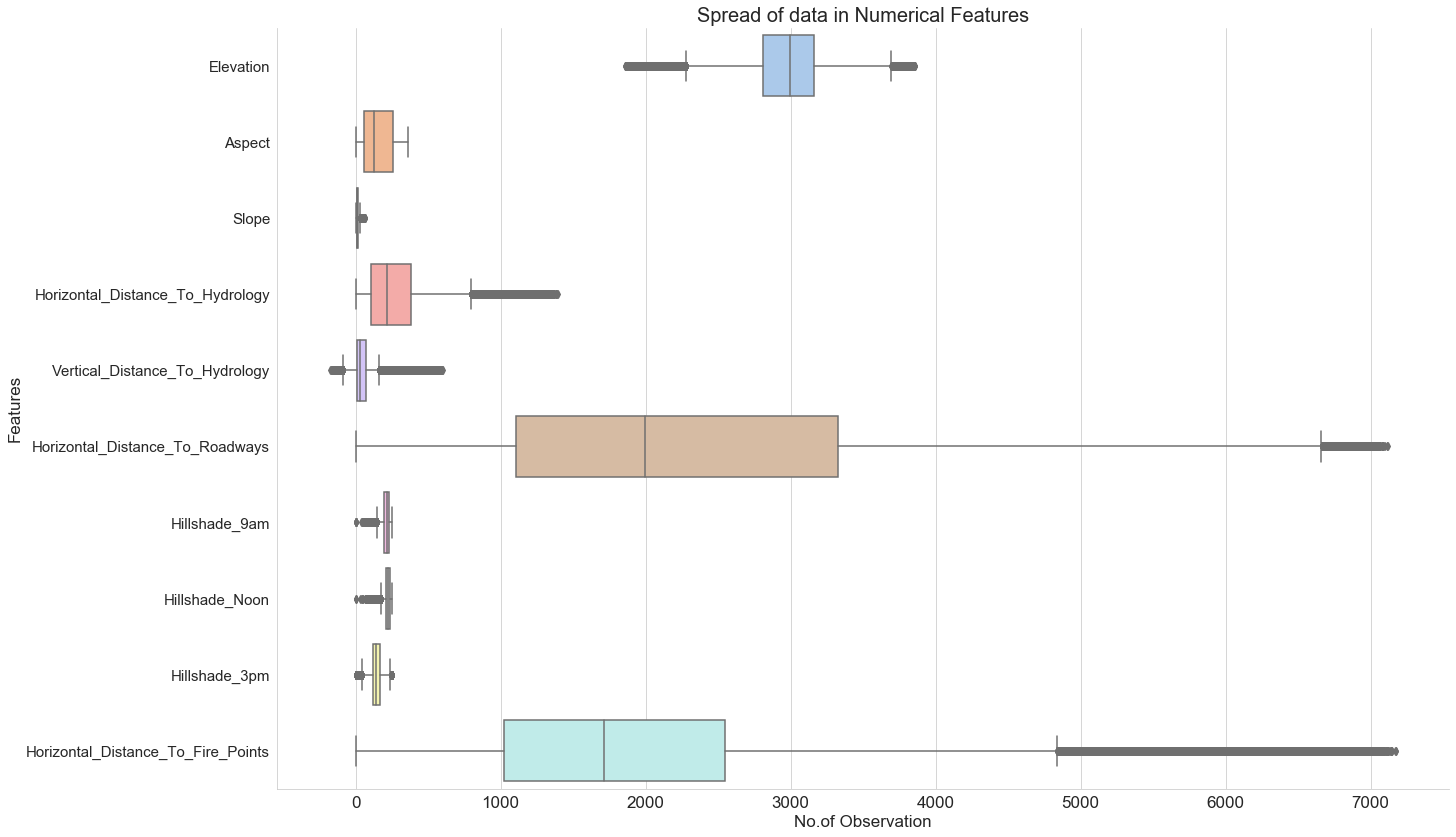

In [13]:
#####    1    ######
# Box and whiskers plot
# Spread of numerical features

# importing pyplot module from matplotlib to plt
plt = matplotlib.pyplot

# plot bg
sns.set_style("whitegrid")

#Size of the plot
plt.subplots(figsize=(21, 14))

# setting color of the plot
color = sns.color_palette('pastel')

# Using seaborn to plot it horizontally with 'color'
sns.boxplot(data = num_fea, orient='h', palette=color)

# Uncomment below code to visualize where every single data observation of the features lie in the plot 
#sns.swarmplot(data = num_fea)  #WARNING THIS WILL TAKE LOTS OF TIME DEPENDING ON CPU POWER AND RAM YOU HAVE  !!

# Title of the graph
plt.title('Spread of data in Numerical Features', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Features', size = 17)

# x-axis label size
plt.xticks(size = 17)
#y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

- As explained by me in [feature statistics](#Feature-Statistics), `Slope` is the most squeezed box plot feature! It's densely packed taking on least range compared to all features. Having little range means `mean` and `median` will be quite close and we saw that before in the table, it has a difference of approx 1. It does have a few outliers though.

- `Aspect` feature is the only one which do not have any outliers having a range of 360. Since both `Aspect` and `Slope` are measured in degrees, `Aspect` takes on much bigger range than `Slope` because it has lowest max score, hence `Aspect` is much less densed than `Slope`. The `first 50%` of the data, from `min to meadian` is more densed than the `last 50%`, its more spread out.

- `Hillshade`s feature also having similar plot like `Slope` including many outliers and taking on smaller range. Similiar plot is for `Vertical_Distance_To_Hydrology` except here the minimum value is negative as we had seen in the table.

- `Elevation` and `Horizontal_Distance_To_Hydrology` are the only features that doesn't have minimum value of 0. `Elevation` instead is plotted in middle having many outliers too.

- `Horizontal_Distance_To_Roadways` is the most spread data of all features because it has the highest standard deviation score followed by `Horizontal_Distance_To_Fire_Points` though this feature has the maximum value. We can see visually only how spread these are and which one is most. `Horizontal_Distance_To_Fire_Points` may be having largest number of outliers I guess from this plot. If we compare these two features, the last 50% of the data of `Horizontal_Distance_To_Roadways` is much more spread and less dense compared to `Horizontal_Distance_To_Fire_Points` , hence having high standard deviation score.

#### Feature Distribution

Now, lets plot how `Wilderness_Area`s are distributed. As we saw earlier in [feature statistics](#Feature-Statistics), the mean of `Wilderness_Area1` and `Wilderness_Area3` were highest which meant there presence were high. Now lets make this assumption more concretely by visualizing it. 

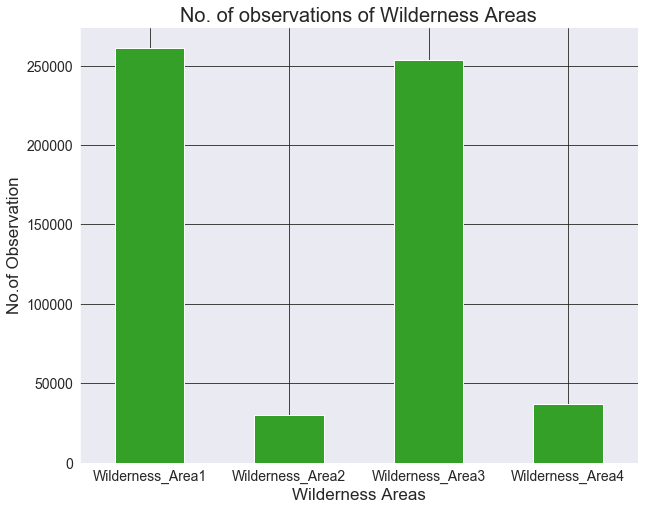

In [14]:
####    2    #####
# Bar plot
# Wilderness Area Count

# Splitting binary_fea data in 2
# Wild_data will have wilderness data
# Soil_Data will have Soil data

# Splitting
Wild_data, Soil_data = binary_fea.iloc[:,:4], binary_fea.iloc[:,4:]

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# list of colors
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]
# using seaborn, passing color to palette
color = sns.color_palette(flatui)

# Sum the data, plot bar with given size using color defined
Wild_data.sum().plot(kind='bar', figsize=(10, 8), color='#34a028')

# Title of the graph
plt.title('No. of observations of Wilderness Areas', size = 20)

# Horizontal axis Label
plt.xlabel('Wilderness Areas', size = 17)
# Vertical axis Label
plt.ylabel('No.of Observation', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 14)
# y-axis label size
plt.yticks(size = 14)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

And here's the visual proof, `Wilderness_Area1` has the most presence followed by `Wilderness_Area3`, both have quite close observations and so were their mean value. `Wilderness_Area2` having the least observation. Lets see their exact values for precision.

In [15]:
# total count of each Wilderness Area
Wild_data.sum()

Wilderness_Area1    260796
Wilderness_Area2     29884
Wilderness_Area3    253364
Wilderness_Area4     36968
dtype: int64

- The difference of observations between `Wilderness_Area1` and `Wilderness_Area3` is approximately `7k`. 

- `Wilderness_Area2` and `Wilderness_Area4` may seem to have less observation but its not, as they have `~29k` and `~36k` observations respectively. Which is very good amount of observations.

**Now Let's see similar visualization for `Soil Types`**

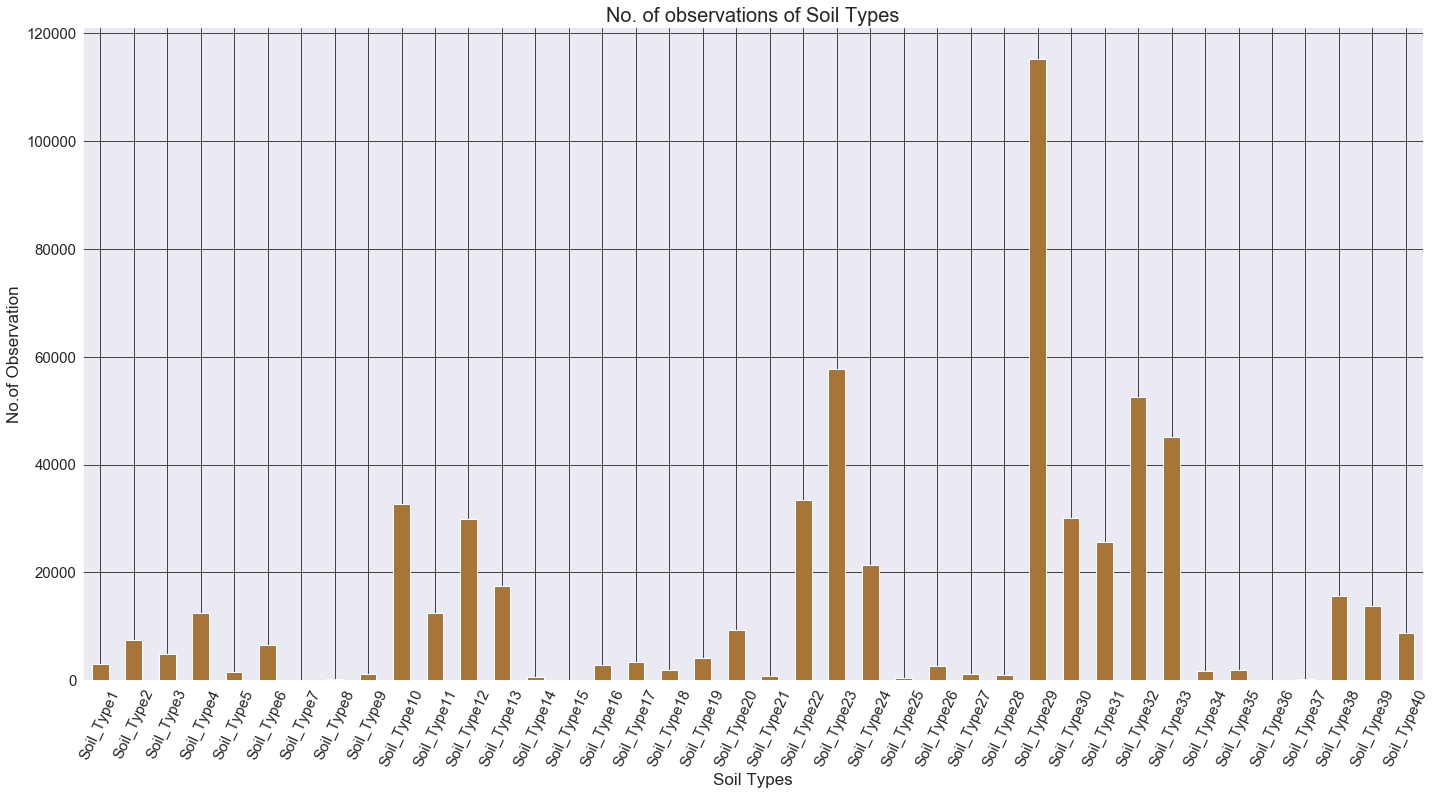

In [16]:
####    3.1    #####
# Bar plot
# Soil Type Count

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})


# Sum the data, plot horizontal bar with given size using color defined
Soil_data.sum().plot(kind='bar', figsize=(24, 12), color='#a87539')

# Title of the graph
plt.title('No. of observations of Soil Types', size = 20)

# Horizontal axis Label
plt.xlabel('Soil Types', size = 17)
# Vertical axis Label
plt.ylabel('No.of Observation', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 65, size = 15)
# y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

In [17]:
# Statistical description of Highest observation of Soil Type seen
Soil_data.loc[:,'Soil_Type29'].describe()

count    581012.000000
mean          0.198356
std           0.398762
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Soil_Type29, dtype: float64

- Looking at the visualization above the first thing I notice that there are visualization of `normal distribution`, `bimodal distribution`, `Unimodal Distribution` and `Left and Right-skewed distribution` showing up in pieces. In short we see all kinds of distributions here!!

- Distribution Observation from Left-Right:
    - The left-most appears to have mostly Normal distribution (`Soil_Type1` - `Soil_Type6`).
    - Unimodal Distribution (`Soil_Type7` - `Soil_Type8`)
    - We see a bimodal distribution (`Soil_Type19` - `Soil_Type14`).
    - Left Skewed Distribution (`Soil_Type15` - `Soil_Type21`).
    - Normal Distribution (`Soil_Type22` - `Soil_Type24`).
    - Right Skewed Distribution (`Soil_Type25` - `Soil_Type28`)
    - Mixture of Right Skewed and Bimodal (`Soil_Type29` - `Soil_Type33`).
    - Normal Distribution (`Soil_Type34` - `Soil_Type35`).
    - Normal Distribution (`Soil_Type36` - `Soil_Type37`).
    - Right Skewed Distribution (`Soil_Type38` - `Soil_Type40`)
    
    
- The most observation is seen from `Soil_Type29` followed by `Soil_Type23`, `Soil_Type32` and `Soil_Type33`. As from statistical analysis done of `Soil_Type29`, it shows that the mean is `~0.198` which mean it alone has presence in approximately `20%` of observations in our data. It also had the least skewed value of all in `Soil Types` as we had seen earlier in Data Exploration.

**Let's see the exact number of observations of `Soil Types` in descending order.**

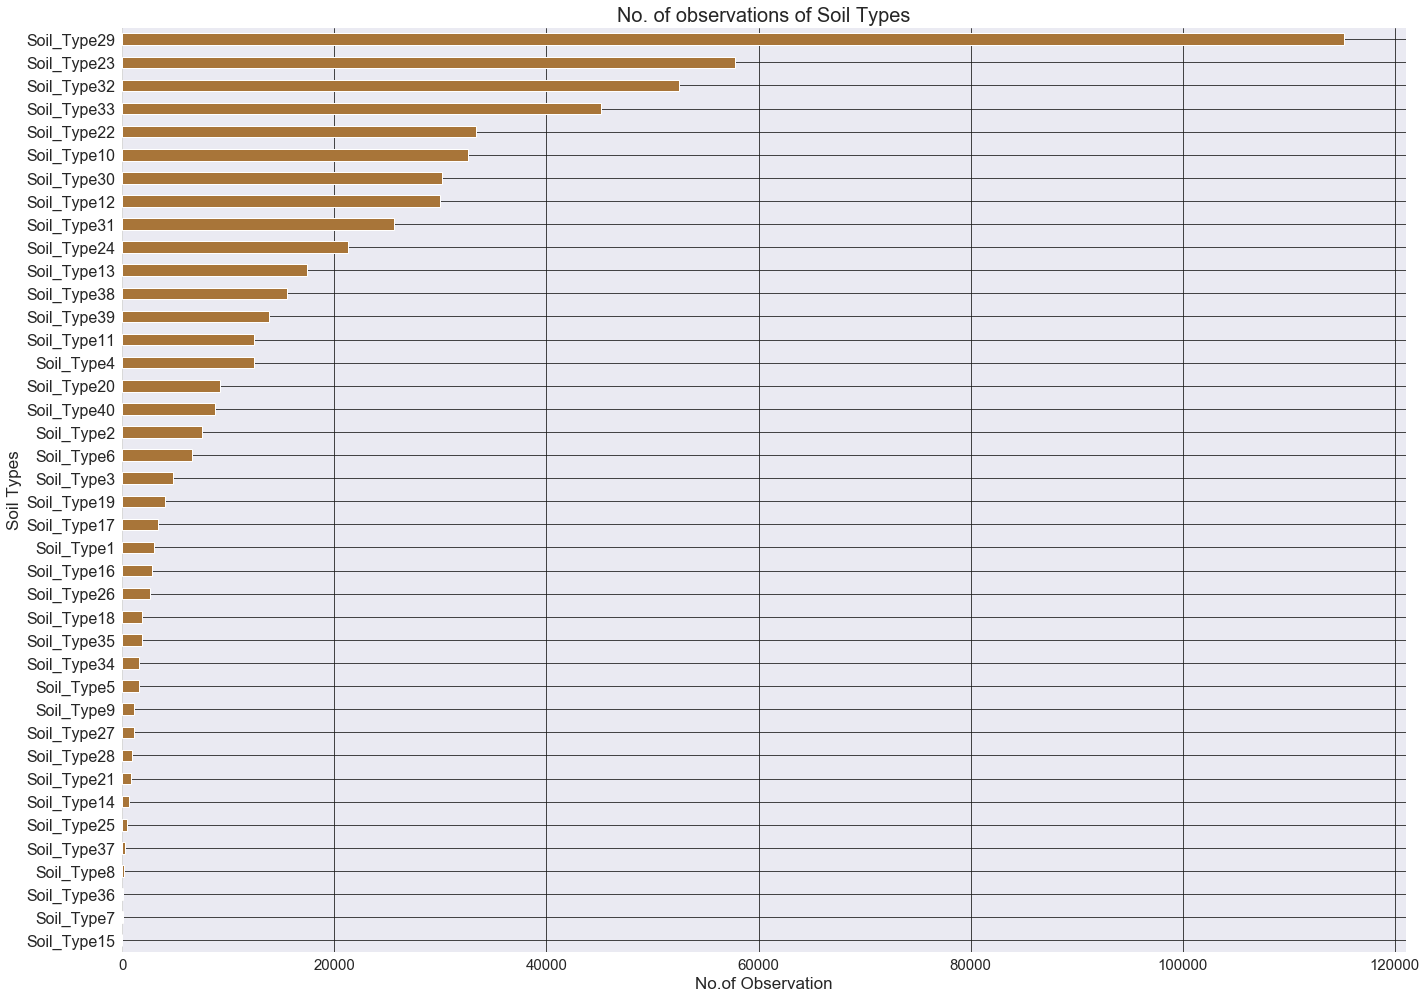

In [18]:
####    3.2    #####
# Horizontal Bar plot
# Soil Type Count

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# sum Soil data values, and pass it as a series 
soil_sum = pd.Series(Soil_data.sum())

# will sort values in descending order
soil_sum.sort_values(ascending = False, inplace = True)

# plot horizontal bar with given size using color defined
soil_sum.plot(kind='barh', figsize=(23, 17), color= '#a87539')

# horizontal bar flips columns in ascending order, this will filp it back in descending order
plt.gca().invert_yaxis()

# Title of the graph
plt.title('No. of observations of Soil Types', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Soil Types', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 15)
# y-axis label size
plt.yticks(size = 16)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

In [19]:
# Exact counts of observations of Soil Type
soil_sum

Soil_Type29    115247
Soil_Type23     57752
Soil_Type32     52519
Soil_Type33     45154
Soil_Type22     33373
Soil_Type10     32634
Soil_Type30     30170
Soil_Type12     29971
Soil_Type31     25666
Soil_Type24     21278
Soil_Type13     17431
Soil_Type38     15573
Soil_Type39     13806
Soil_Type11     12410
Soil_Type4      12396
Soil_Type20      9259
Soil_Type40      8750
Soil_Type2       7525
Soil_Type6       6575
Soil_Type3       4823
Soil_Type19      4021
Soil_Type17      3422
Soil_Type1       3031
Soil_Type16      2845
Soil_Type26      2589
Soil_Type18      1899
Soil_Type35      1891
Soil_Type34      1611
Soil_Type5       1597
Soil_Type9       1147
Soil_Type27      1086
Soil_Type28       946
Soil_Type21       838
Soil_Type14       599
Soil_Type25       474
Soil_Type37       298
Soil_Type8        179
Soil_Type36       119
Soil_Type7        105
Soil_Type15         3
dtype: int64

- The least observation are of `Soil_Type15` of `3`. Thats why it had most skewed value of all `Soil Types` of `~440` which now makes sense since this feature has value of `0` for all except for `3` observations hence making it densly concentrated towards `0` and long flat tail to the right having a form of `positively skewed distribution` or `Right Skewed Distribution`. We saw this in [Feature
Skew](#Feature-Skew) section.
- `Soil_Type29` has the highest, `115,246` observations.

-------

#### Feature Comparison

**Next let's compare each feature in our data to our target variable, visualizing how much dense and distributed each target variable's class is compared to the feature. We will use [Violin Plot](https://datavizcatalogue.com/methods/violin_plot.html) to visualize this, a combination of Box Plot and Density Plot (Histogram).**

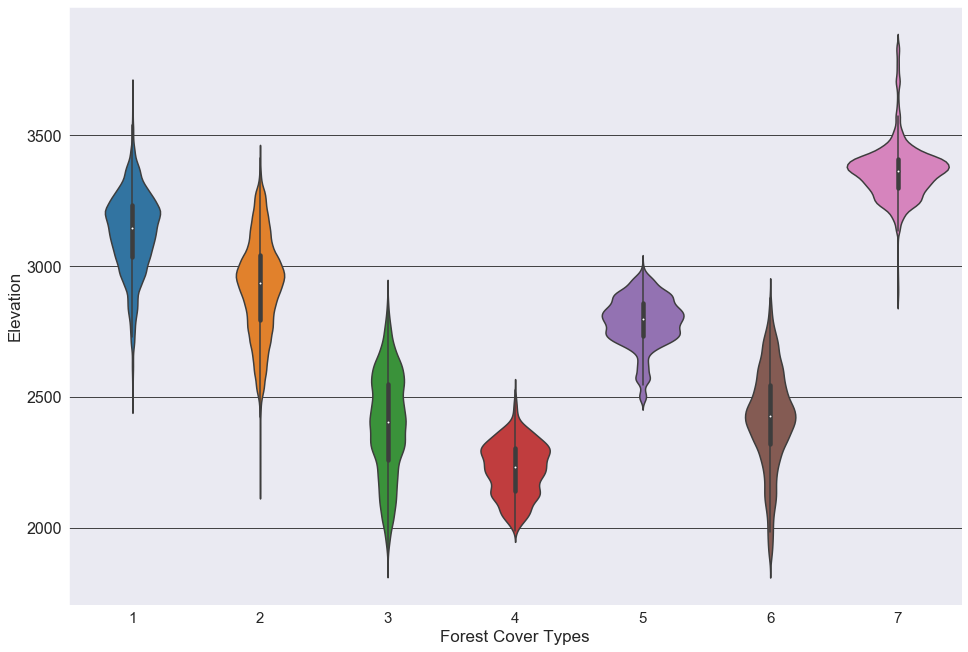

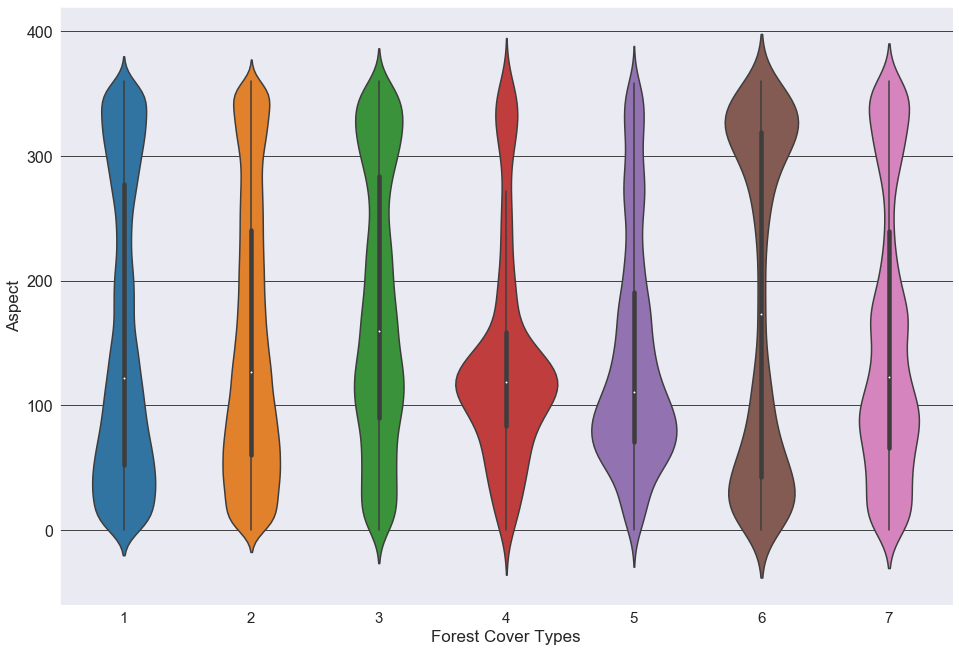

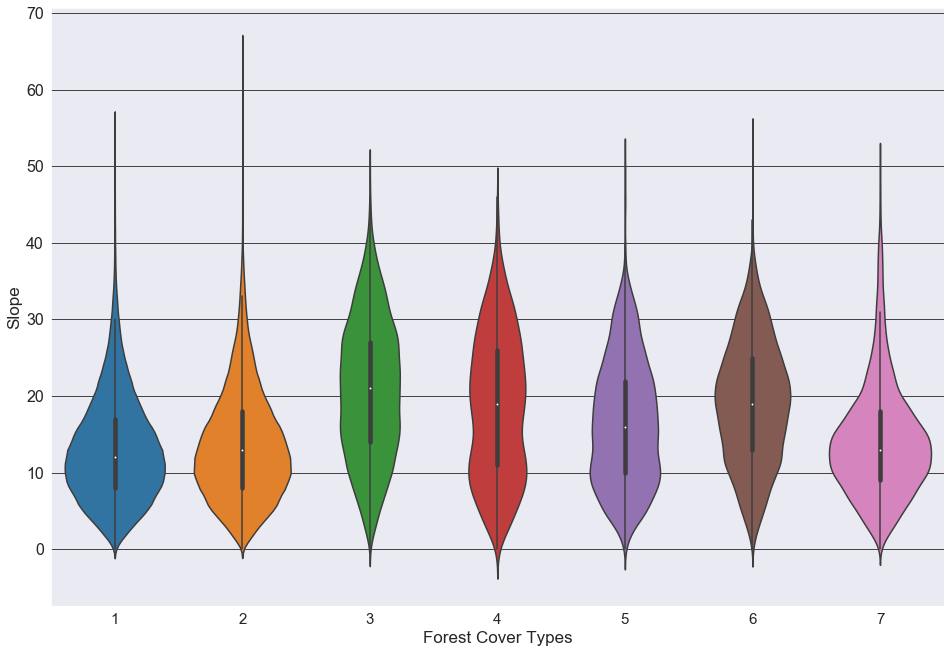

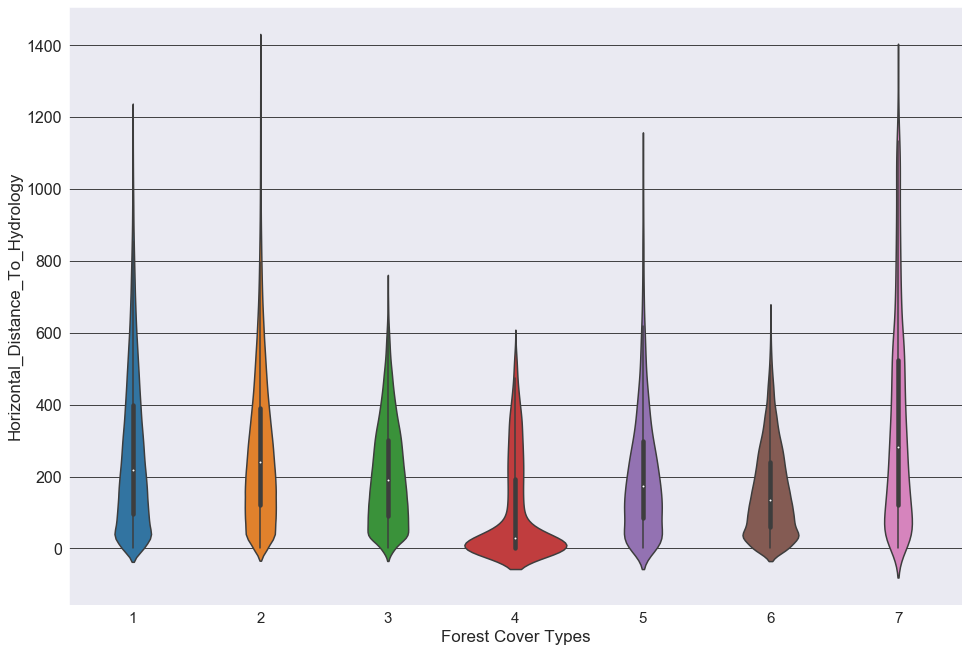

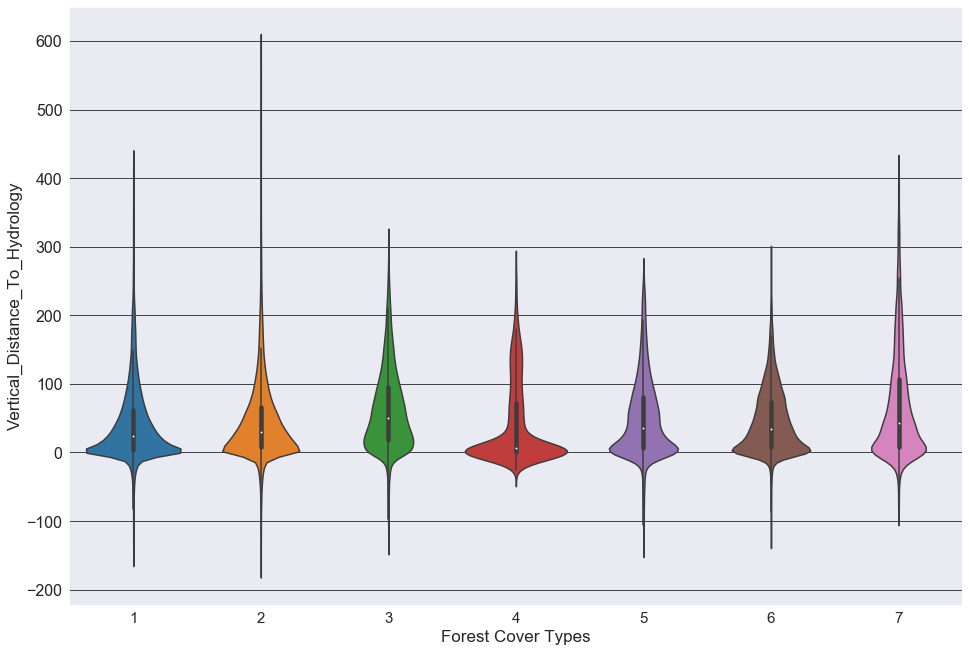

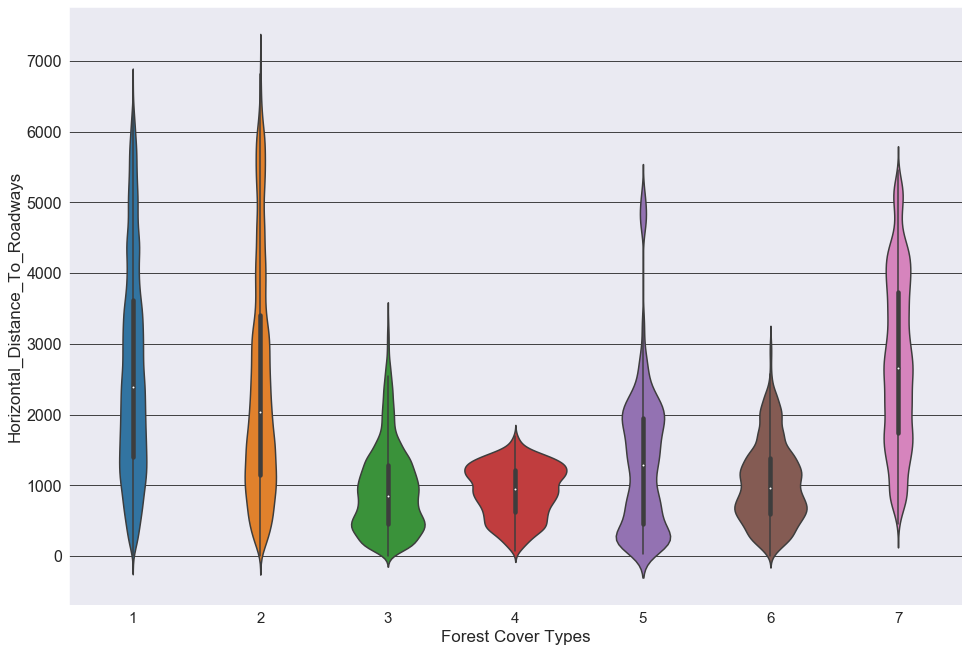

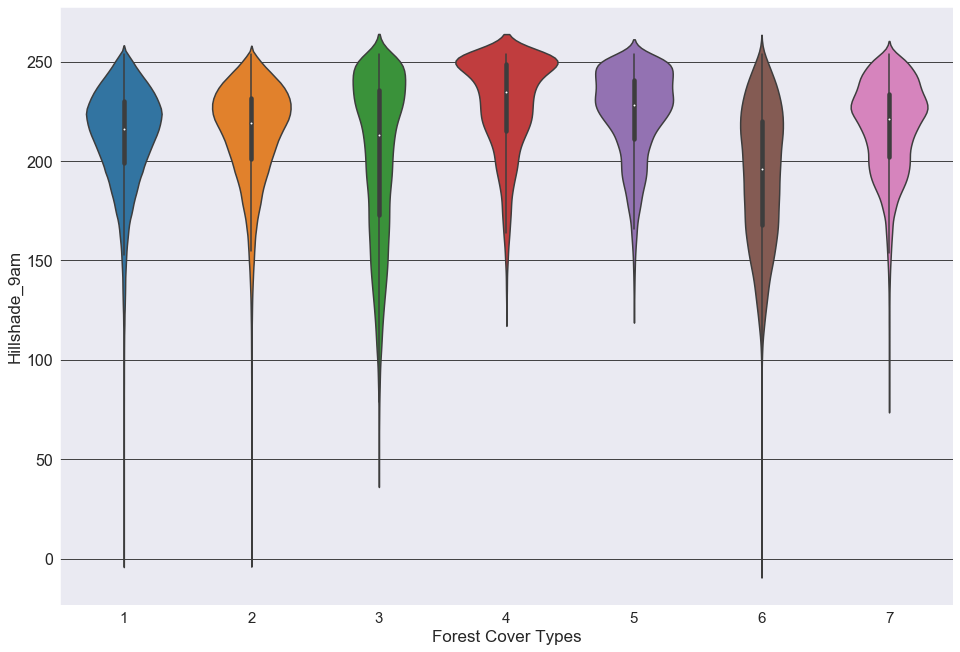

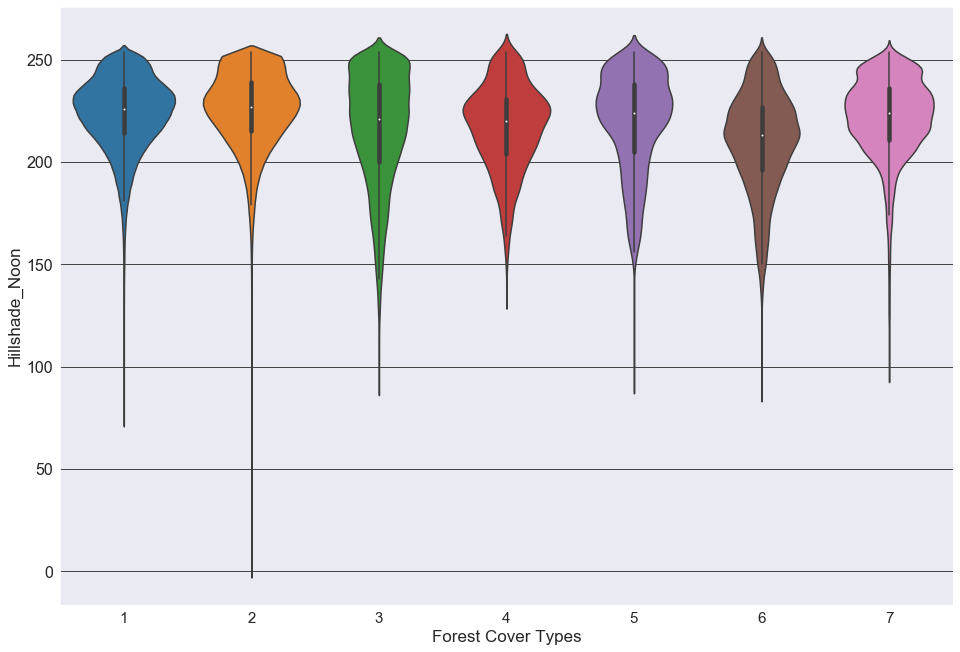

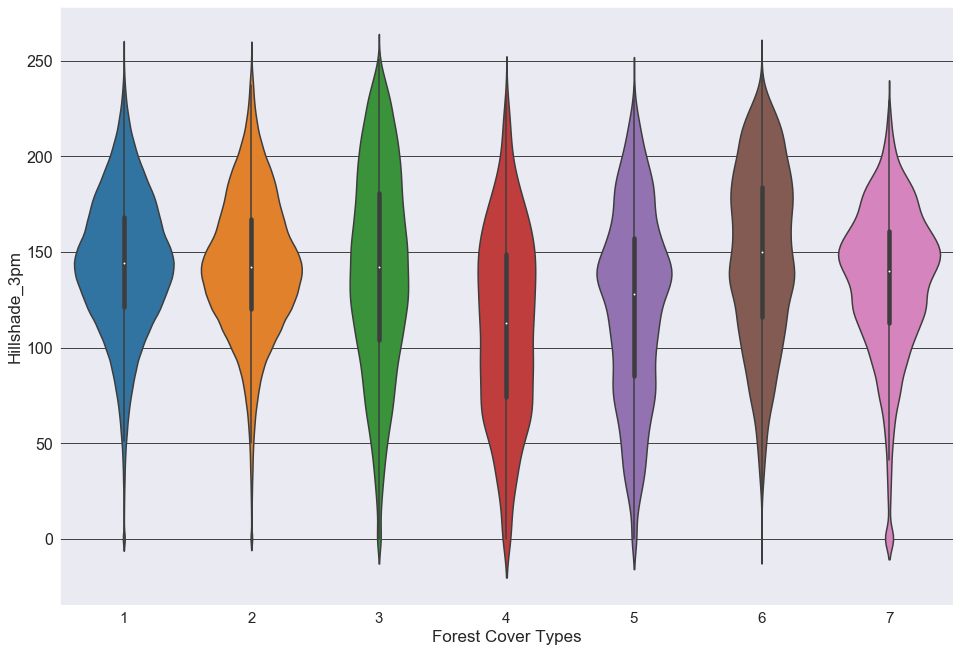

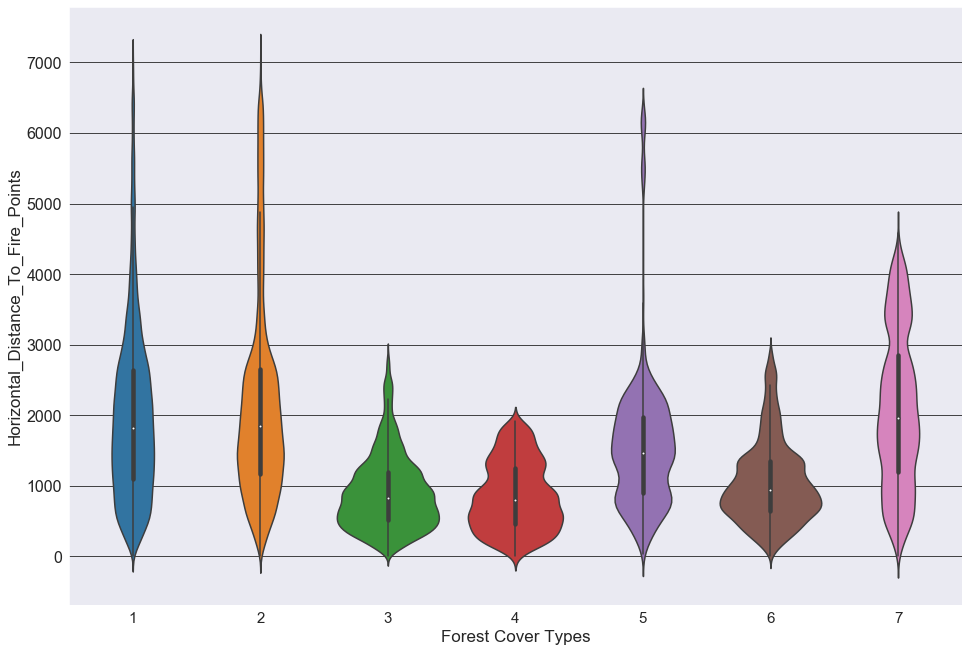

In [20]:
#######    4.1    ########
# Violin Plot (Box + Density)
# Comparing numerical features with target variable


# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# setting target variable
target = data['Cover_Type']

# features to be compared with target variable
features = num_fea.columns


# loop for plotting Violin Plot for each features in the data
for i in range(0, len(features)):
    
    #figure size
    plt.subplots(figsize=(16, 11))
    
    # Plot violin for i feature for every class in target 
    sns.violinplot(data=num_fea, x=target, y = features[i])
    
    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 16)

    # Horizontal axis Label
    plt.xlabel('Forest Cover Types', size = 17)
    # Vertical axis Label
    plt.ylabel(features[i], size = 17)
  
    # display plot
    plt.show()

We can say so much by looking at these plots of each features. Their medians, interquartile range, skewness, density etc. I will only brief those that are intresting and have valueable information to tell us:

- `Elevation` takes on different range of values for different forest classes. Most of the forest at the elevation between `2000m - 25000m` are of `class 4 forest type` while `class 3 forest type` has fewer presence of such `elevation`. `Class 7 forest type` have the observations of most elevated trees ranging from as low as `~2800m` to as high as `~3800m`. The `'max'` value in `elevation` belongs to `class 7 forest type`. This is the most important feature since every feature tells different story to different classes of forest cover type hence an important feature for our algorithm.

- `Aspect` is the feature that has normal distribution for each class.

- `Slope` feature takes on lower values compared to most features as its measured in degrees and least to `Aspect` which is also measured in degrees. It has the `least maximum` value of all features and by looking the plot above we can say that it belongs to `Forest Cover Type 2`. All classes have dense slope observations between `0-20 degrees`.

- `Horizontal distance to hydrology` has the `right or positively skewed distribution` where most of the values for all classes are towards `0-50m`.

- `Vertical distance to hydrology` is also `positively skewed distribution` but this takes on values much closer to `0` for all classes for most observations.The `highest value` in this feature belongs to `Forest cover type 2`. And this feature also has the `least minimum value` of all features and that also belongs to `class 2 forest type`, hence `class 2` having most range of data observations compared to all other classes.

- `Hillshade_9am` and `Hillshade_Noon` are `left or negatively skewed distributions` where they take on max value between `200-250 index value` for most observations in each class. While `Hillshade_3pm` has `normal distribution` for all classes.


**Now lets see similar visualize for `Wilderness Areas`**

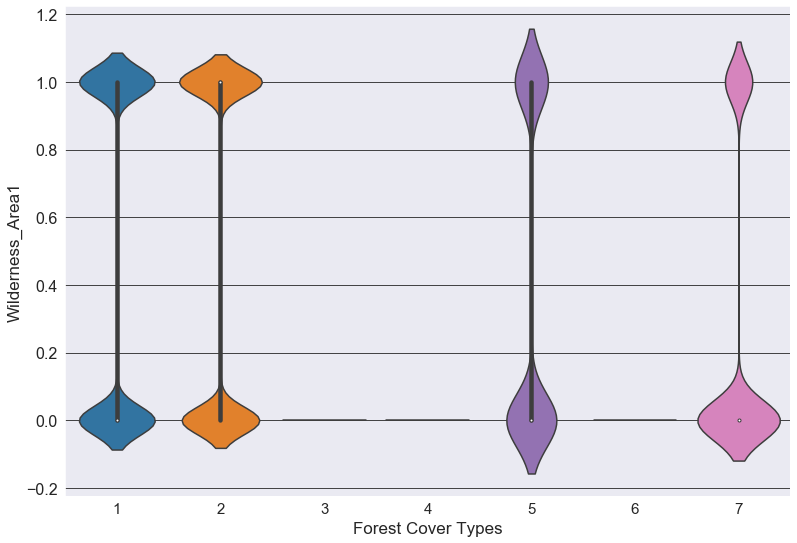

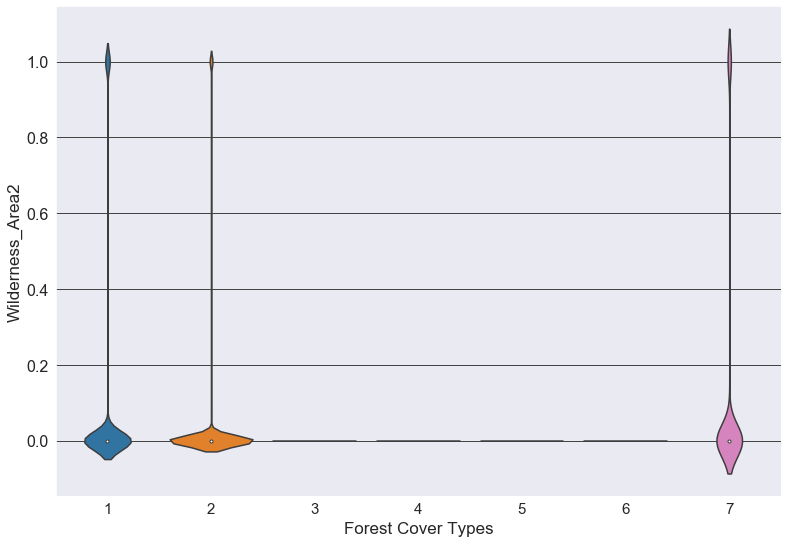

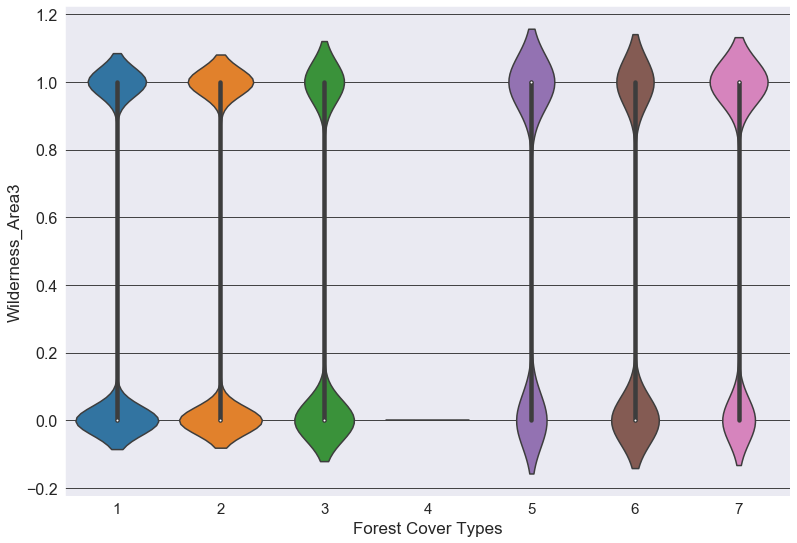

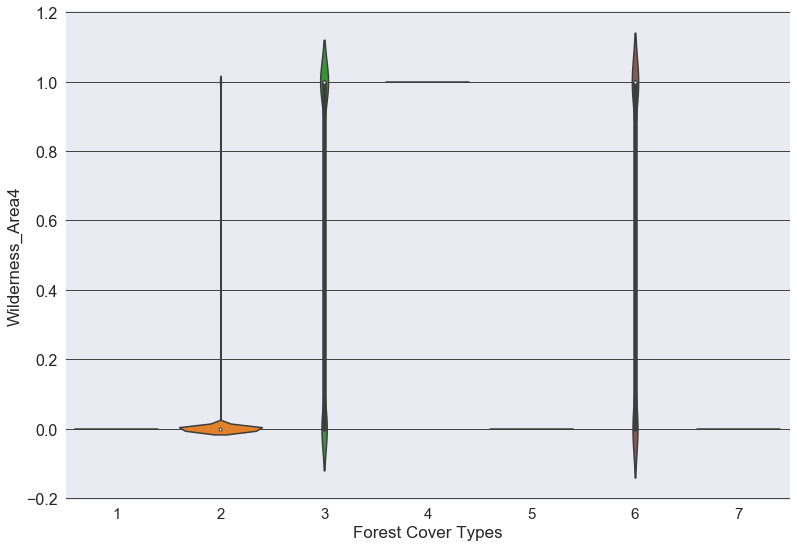

In [21]:
#######    4.2    ########
# Violin Plot (Box + Density)
# Comparing Wilderness features with target variable


# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# setting target variable
target = data['Cover_Type']
# features to be compared with target variable
features = Wild_data.columns


# loop for plotting Violin Plot for each features in the data
for i in range(0, len(features)):
    
    #figure size
    plt.subplots(figsize=(13, 9))
    
    # Plot violin for i feature for every class in target
    sns.violinplot(data = Wild_data, x=target, y = features[i])
    
    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 16)

    # Horizontal axis Label
    plt.xlabel('Forest Cover Types', size = 17)
    # Vertical axis Label
    plt.ylabel(features[i], size = 17)

    # display plot
    plt.show()

The reason these plots look so different than before is because these features take on value ranging between `0 and 1`. 

- `Wilderness Area 1` belong to `forest cover type 1, 2, 5 and 7` while `wilderness area 3` shows presence in `all classes` except `Forest Cover Type 4`.

- `Wilderness Area 2 and 4` have less observations, their dense is less on `1` on all classes compared to other two `Wilderness Areas 1 and 3`.



**Now lets visualize `Soil Type`...**

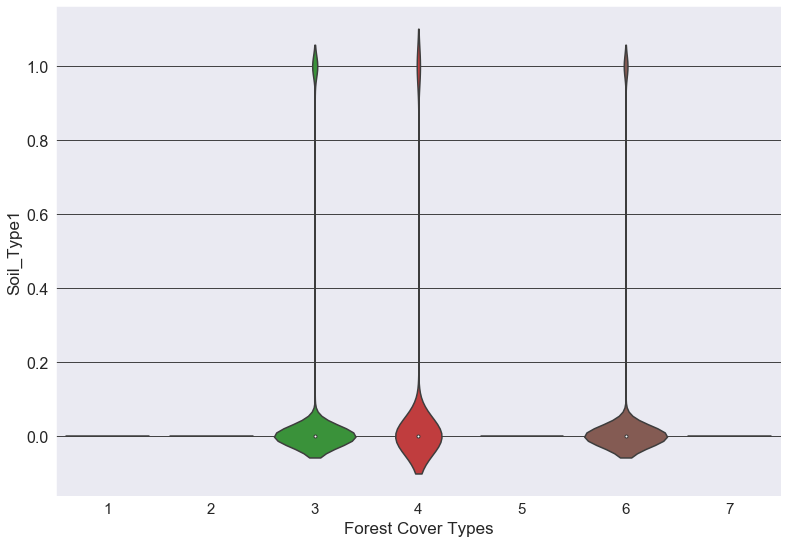

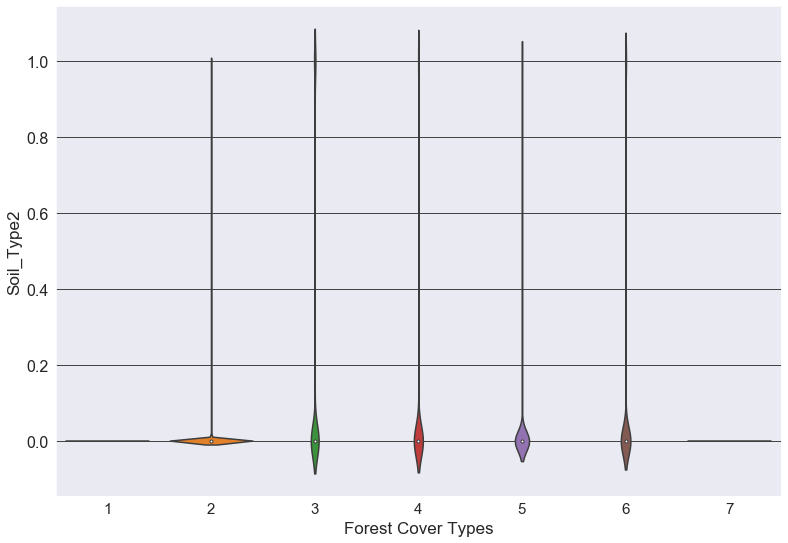

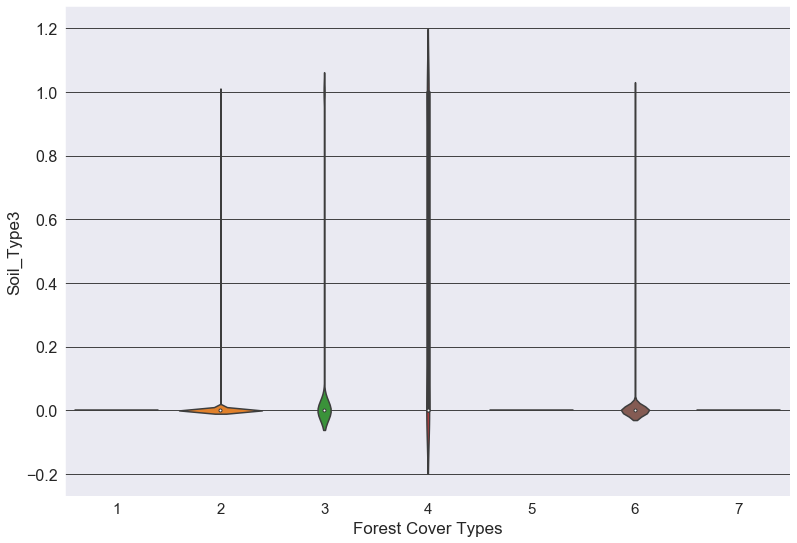

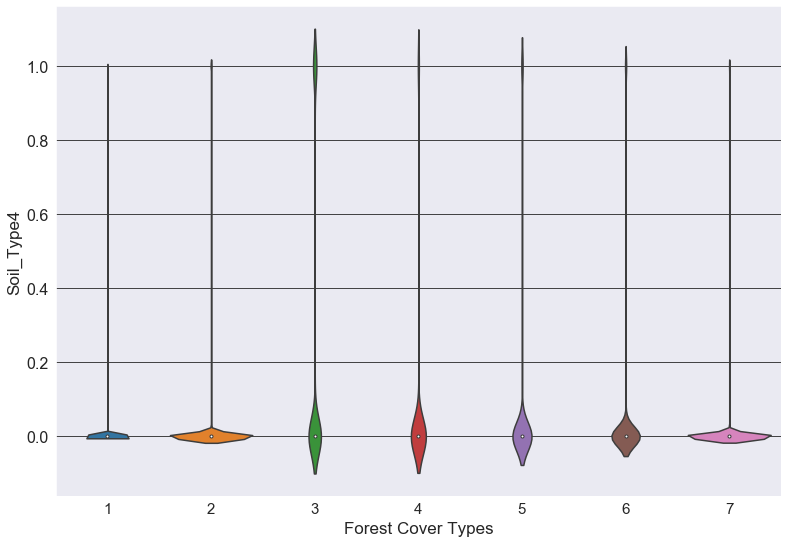

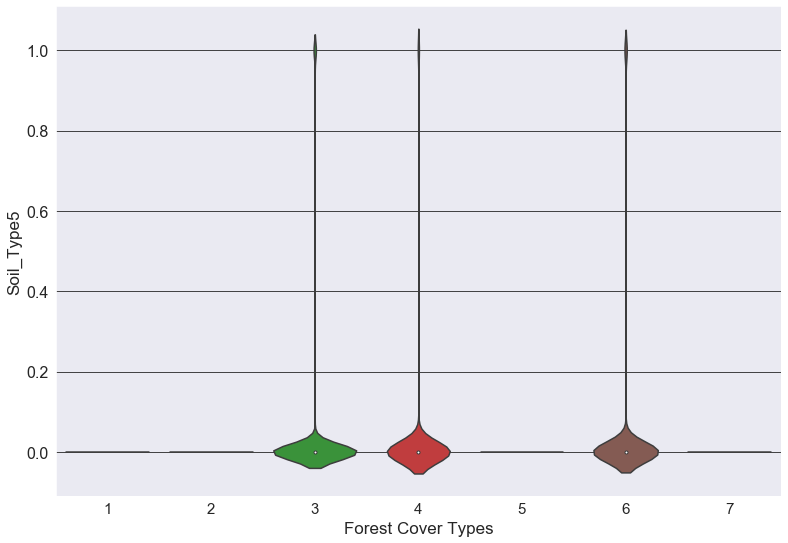

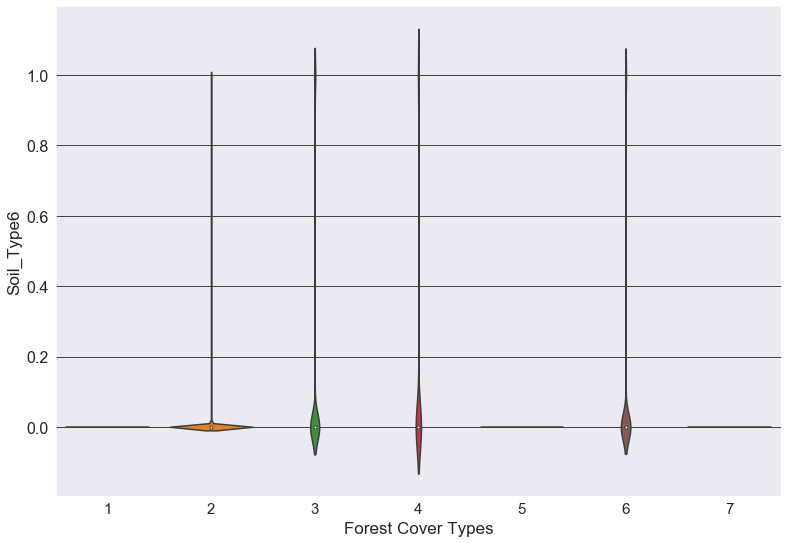

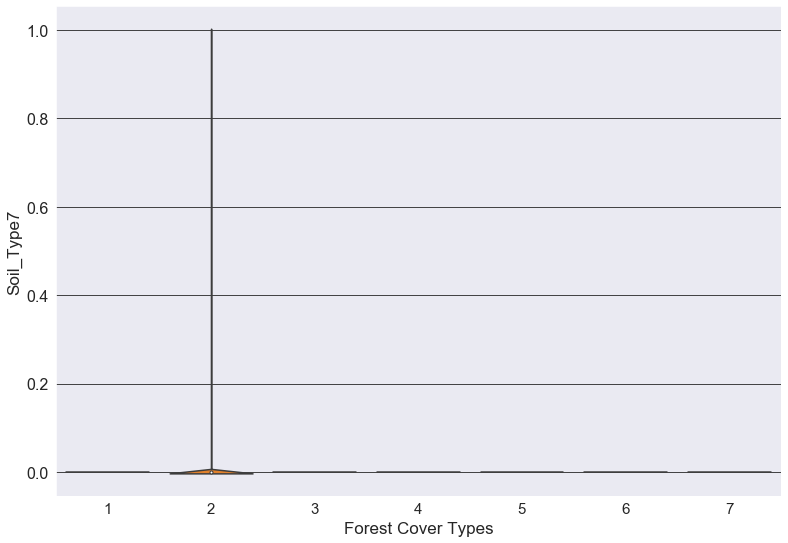

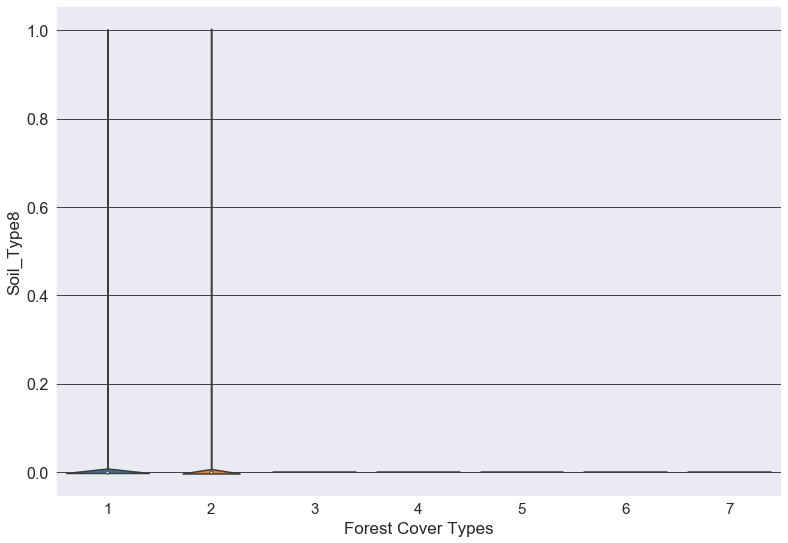

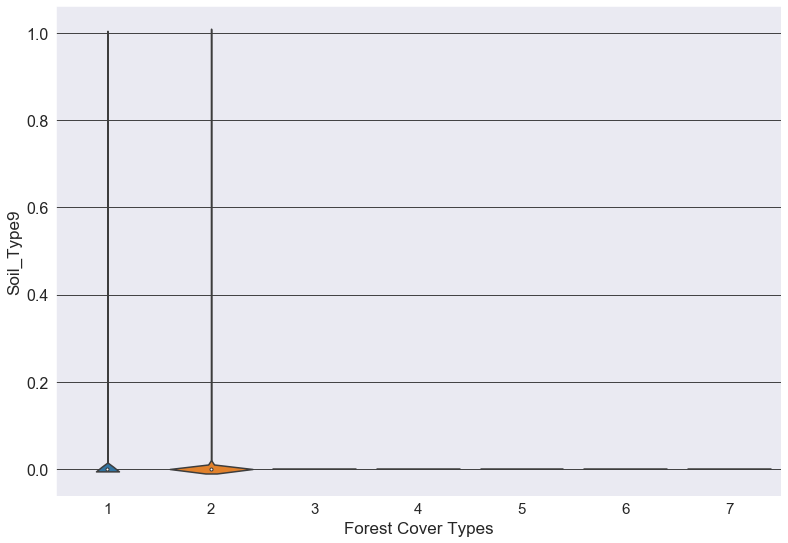

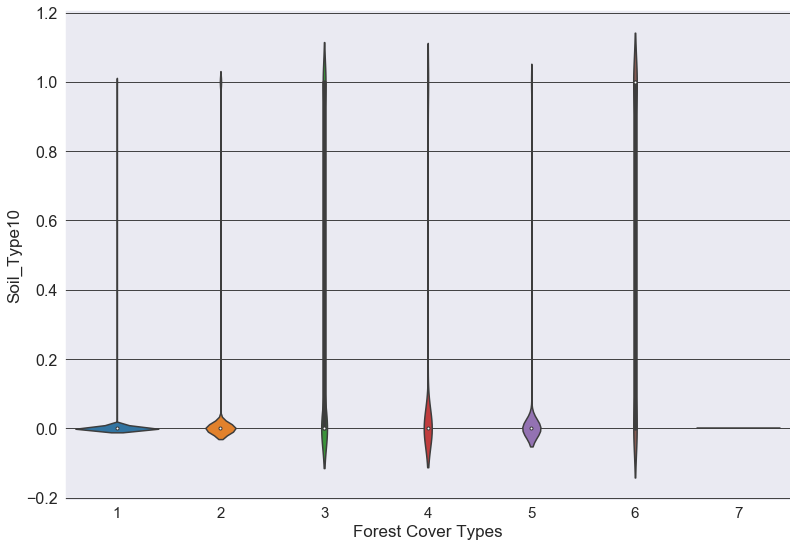

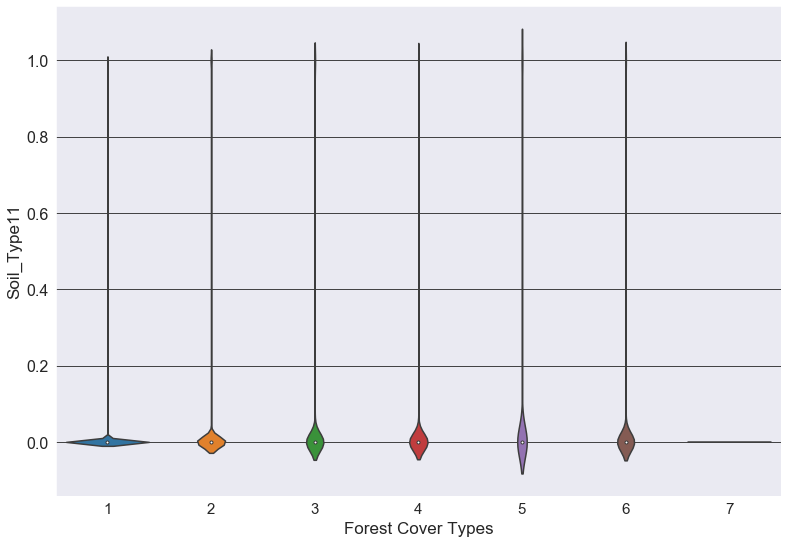

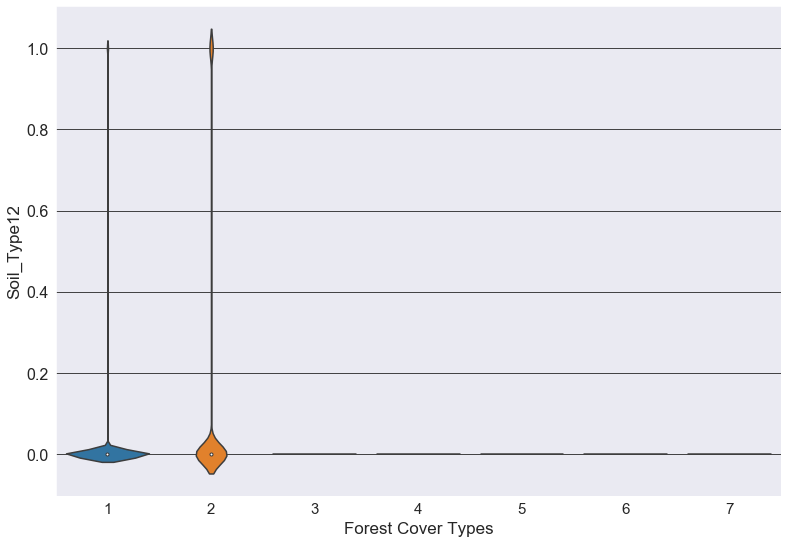

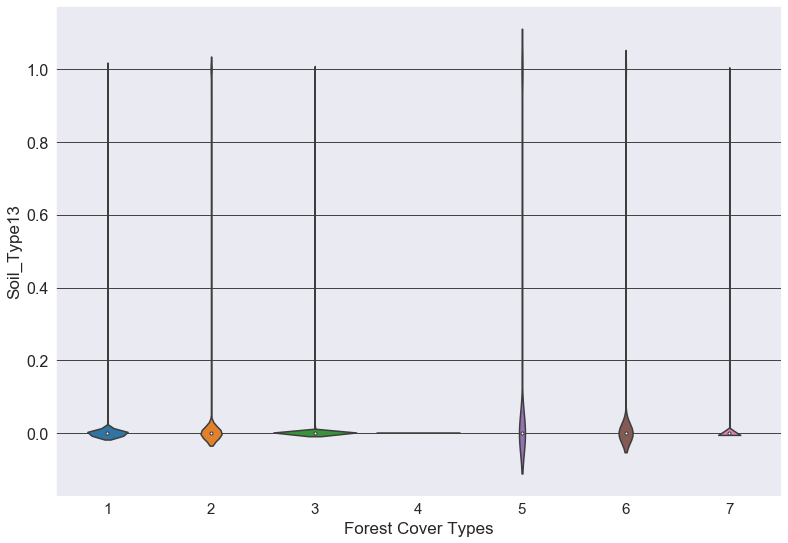

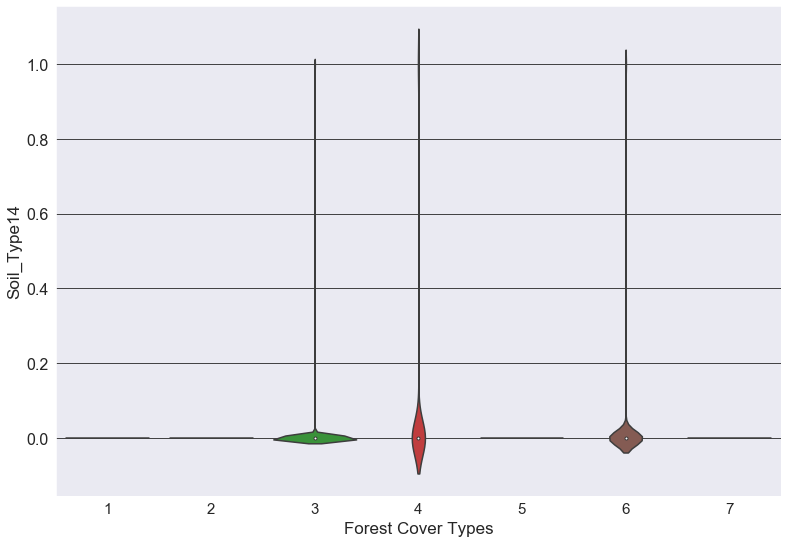

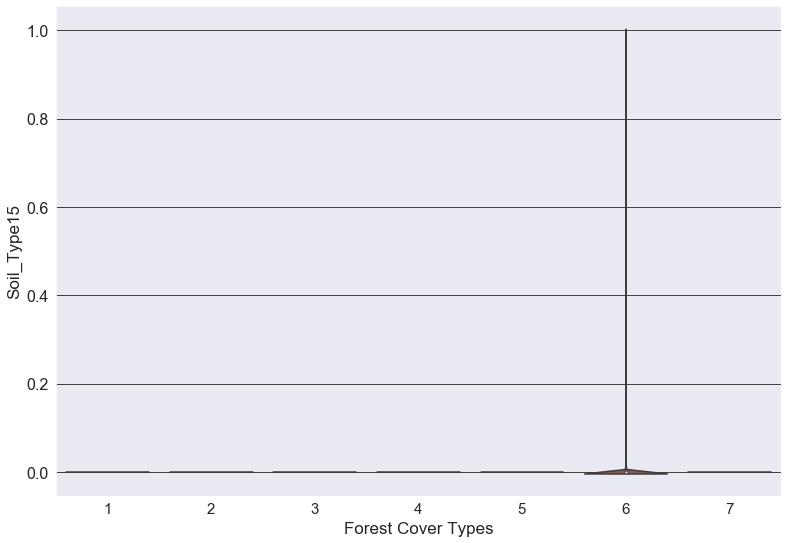

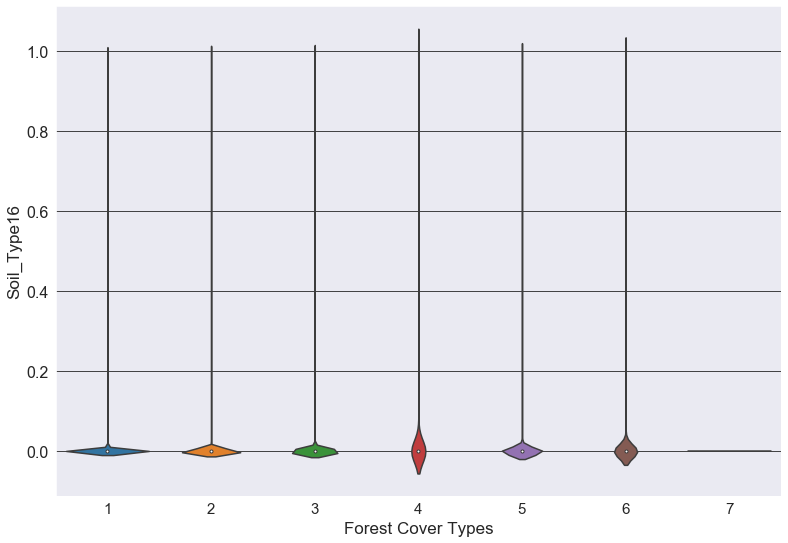

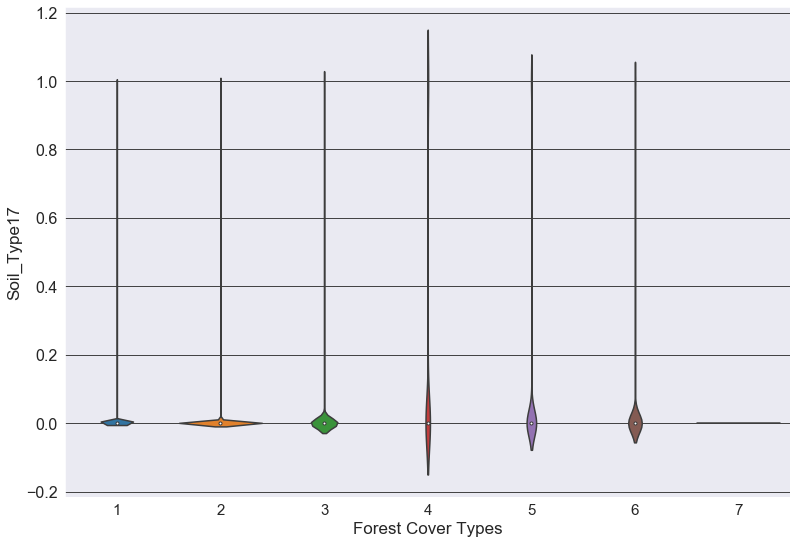

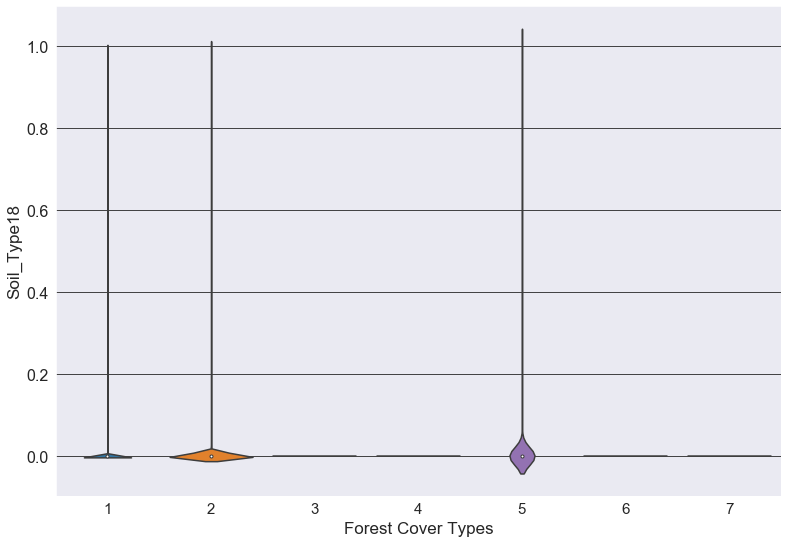

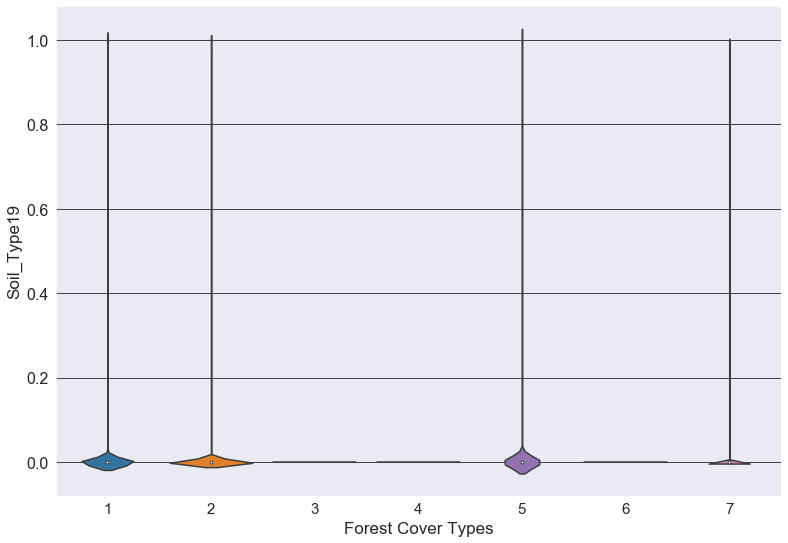

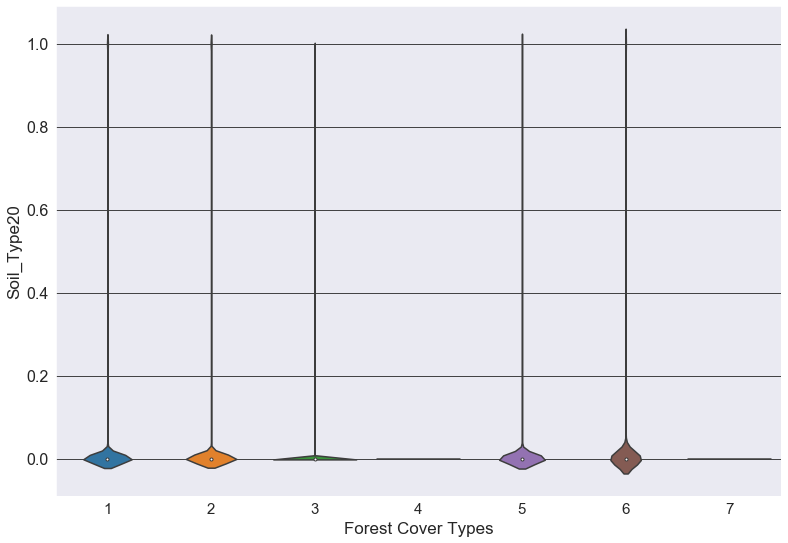

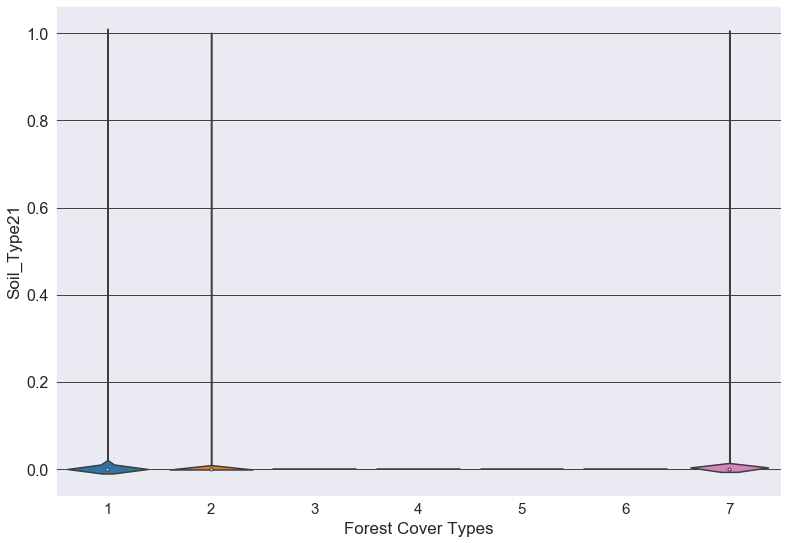

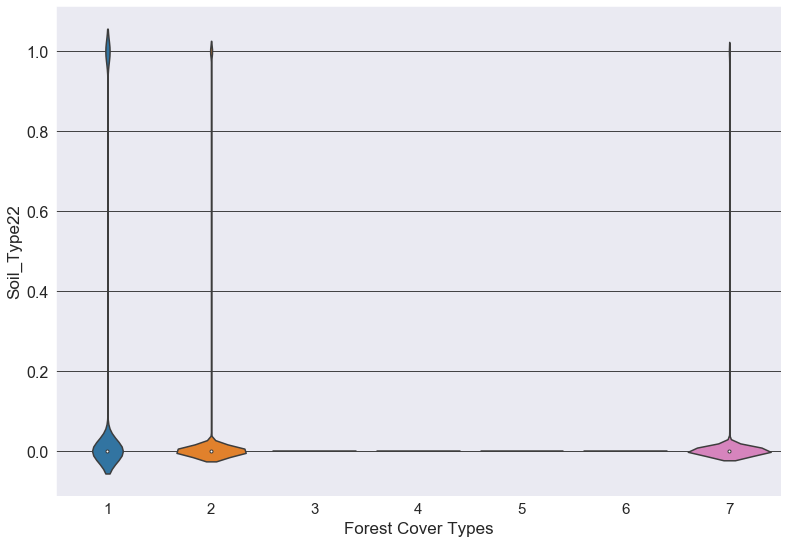

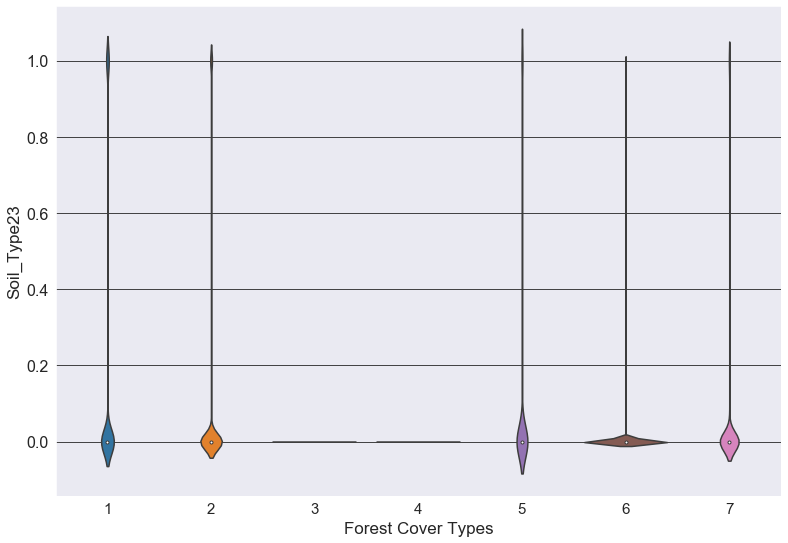

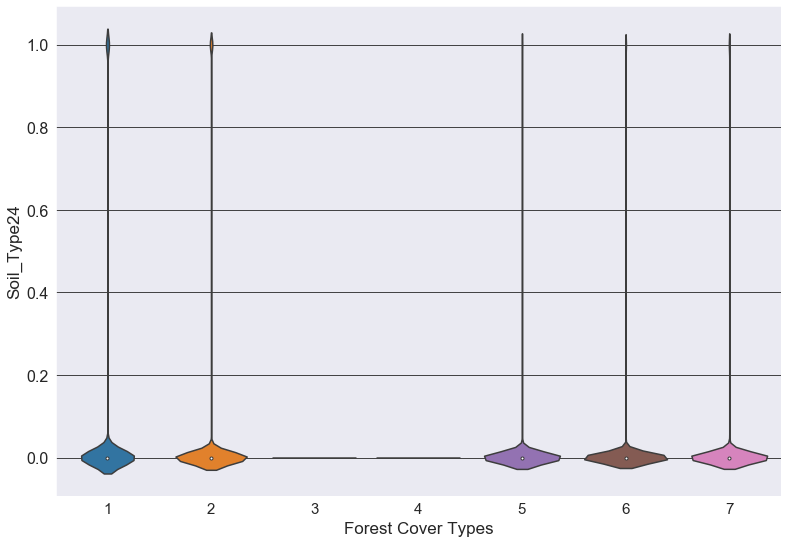

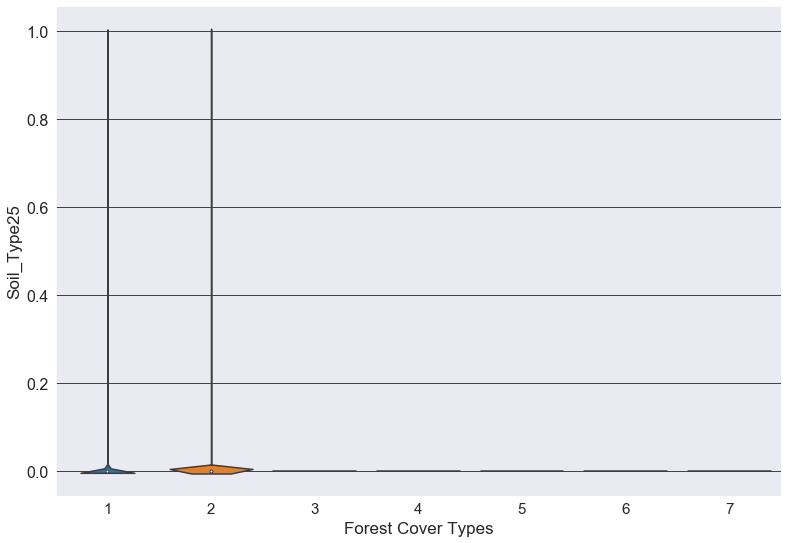

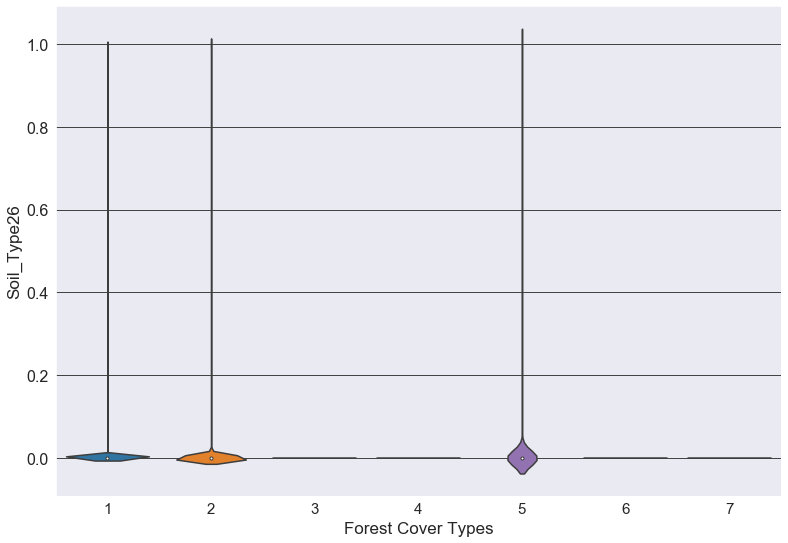

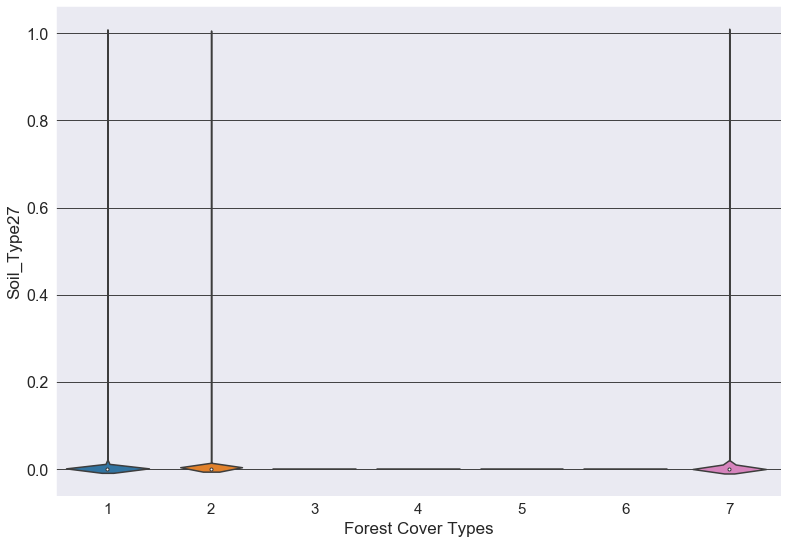

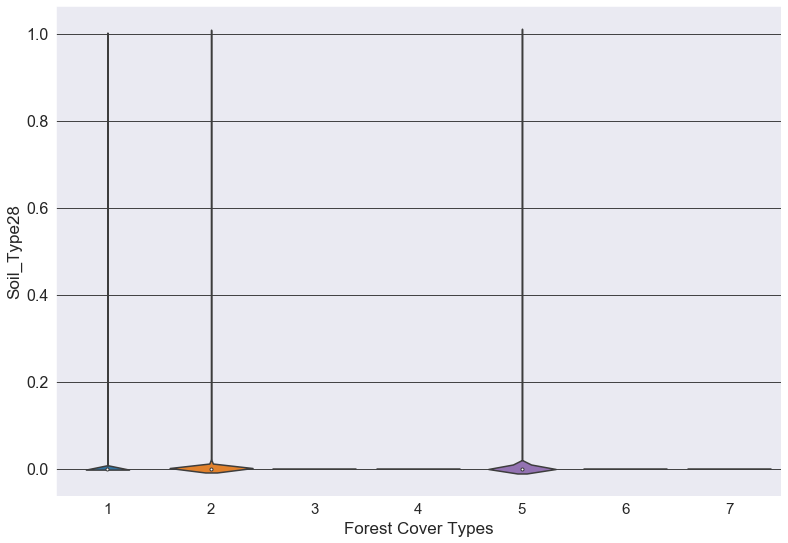

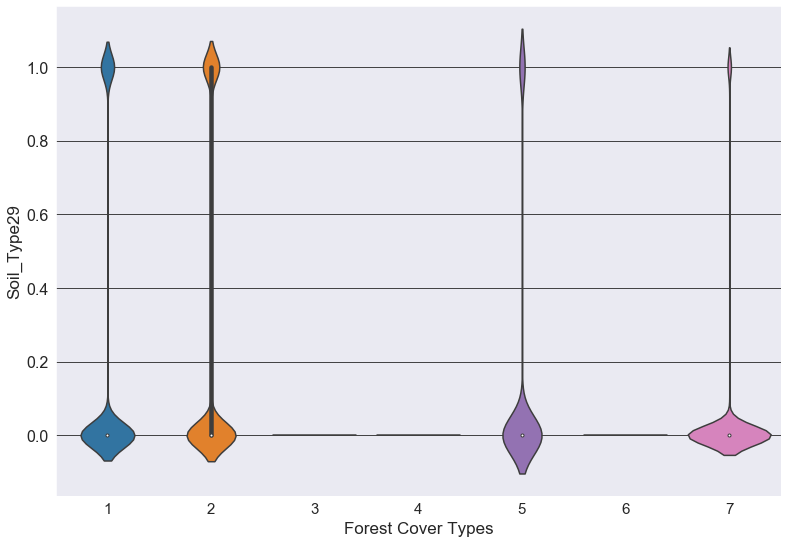

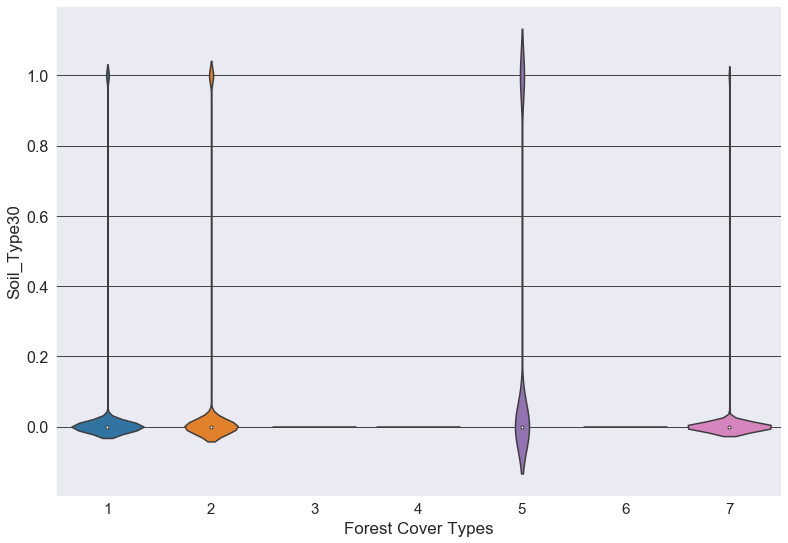

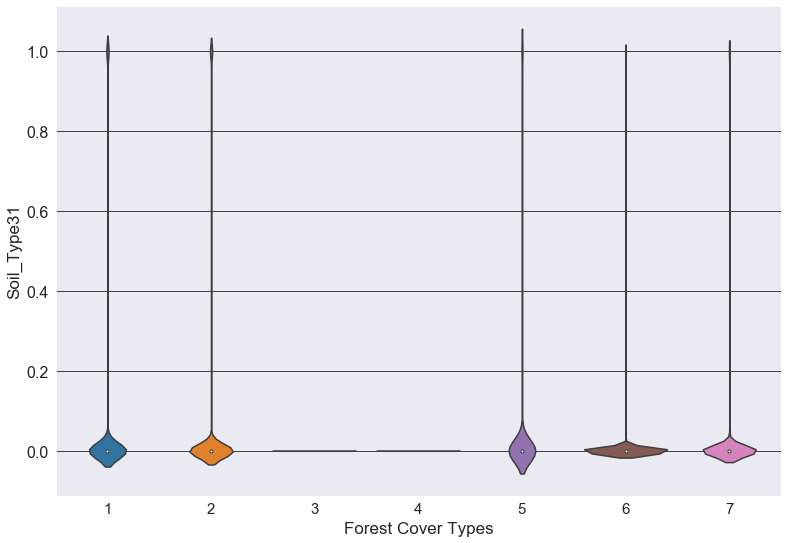

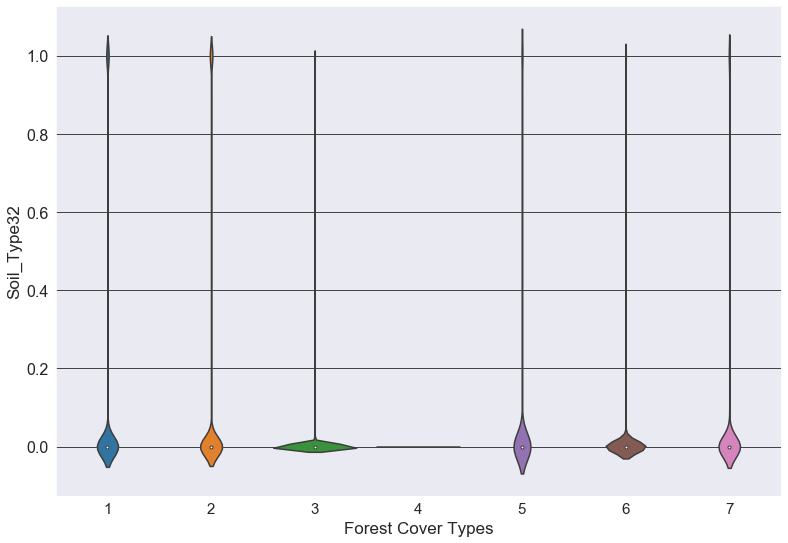

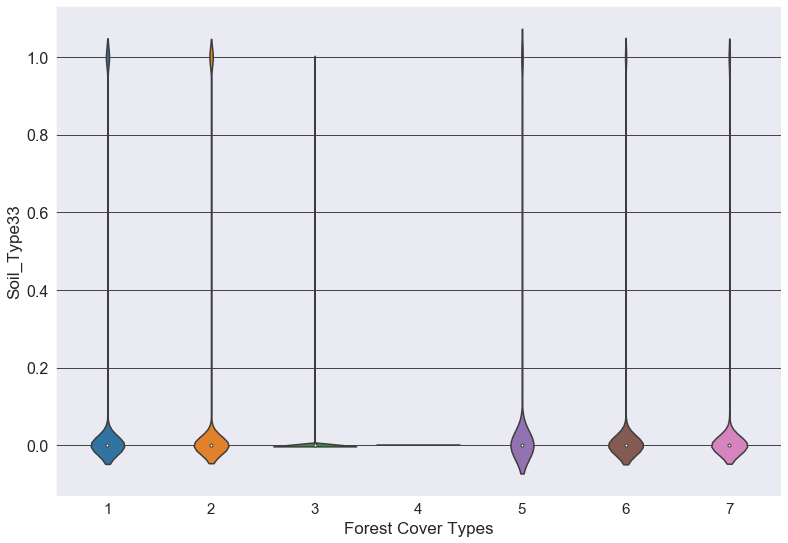

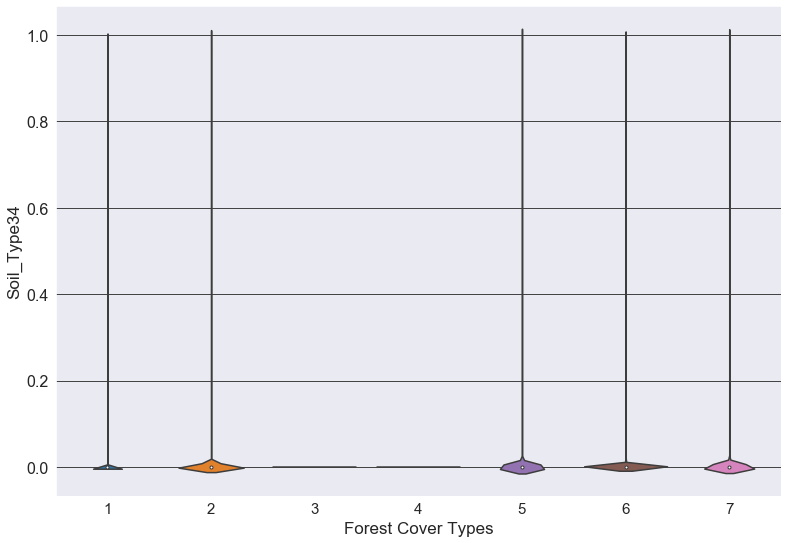

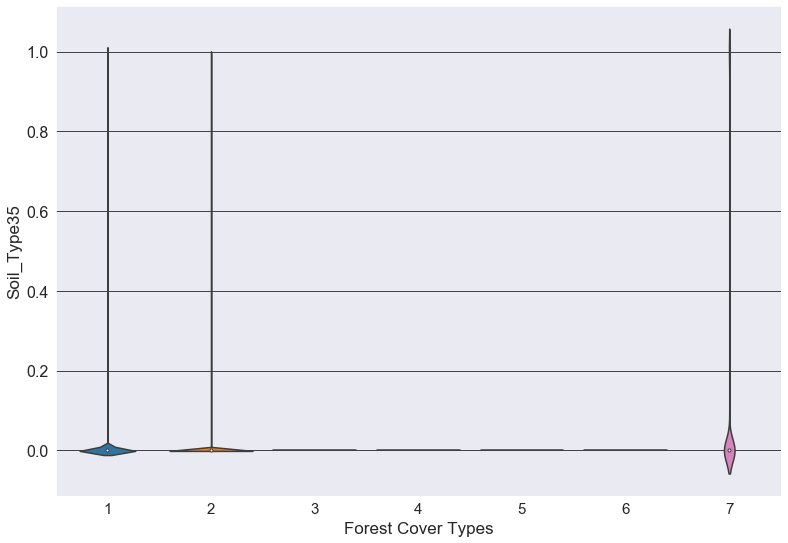

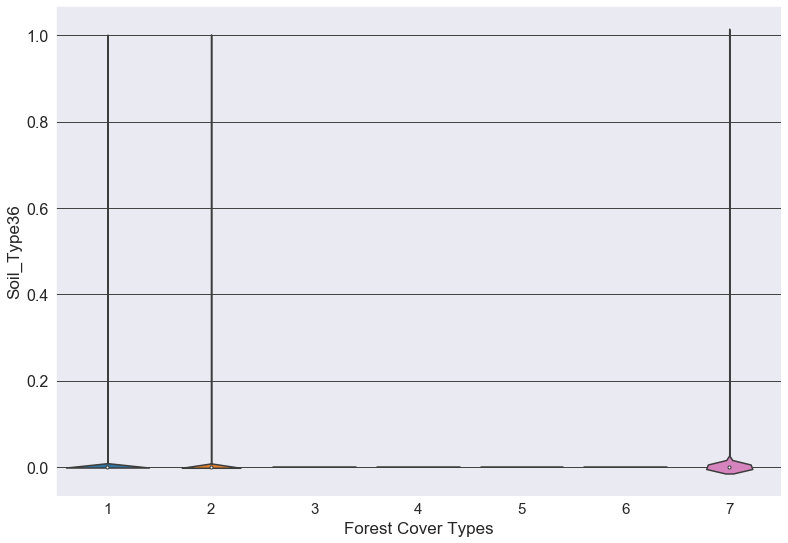

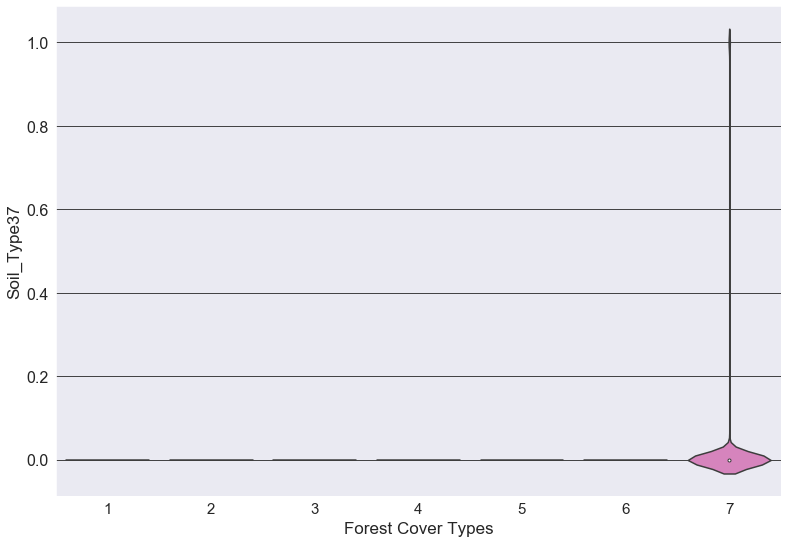

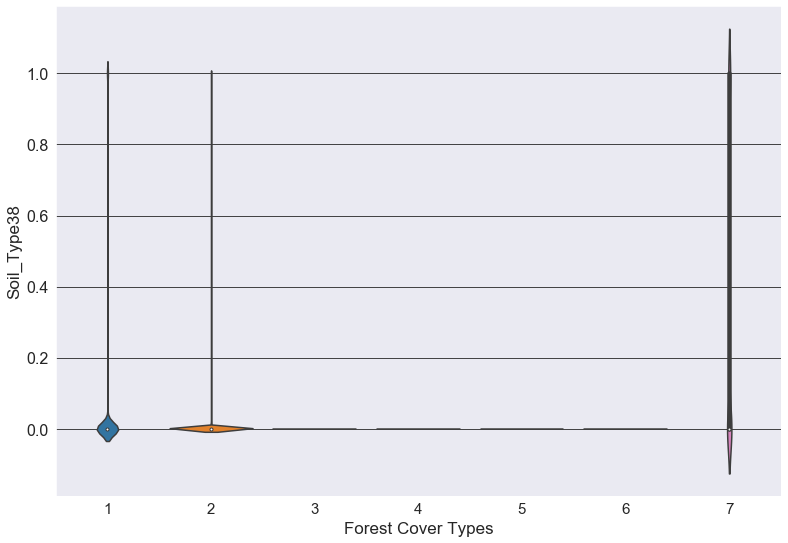

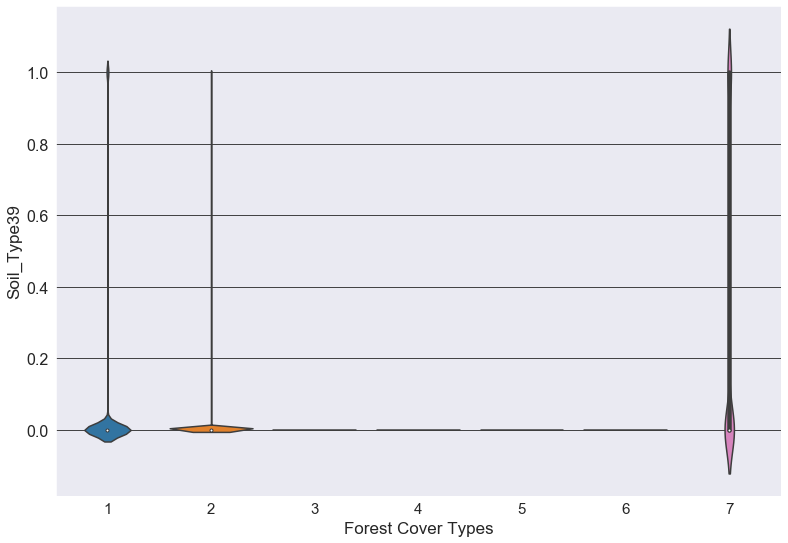

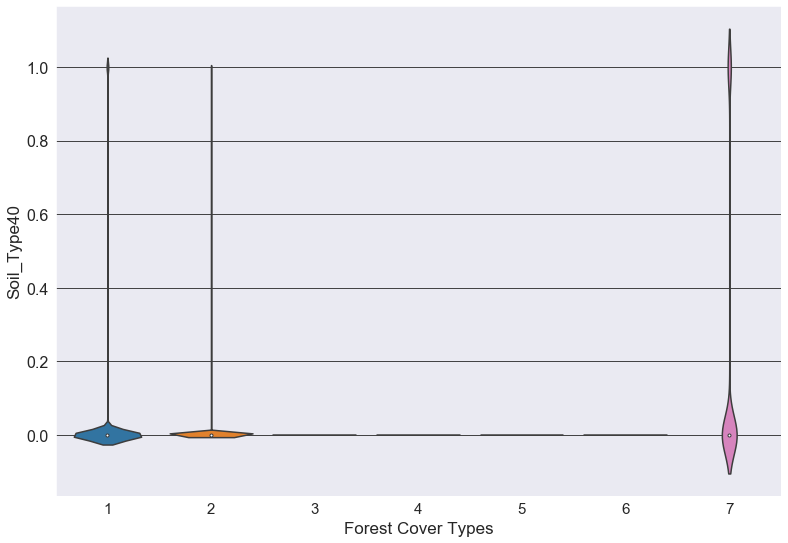

In [22]:
#######    4.3    ########
# Violin Plot (Box + Density)
# Comparing Soil features with target variable


# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# setting target variable
target = data['Cover_Type']
# features to be compared with target variable
features = Soil_data.columns


# loop for plotting Violin Plot for each features in the data
for i in range(0, len(features)):
    
    #figure size
    plt.subplots(figsize=(13, 9))
    
    # Plot violin for i feature for every class in target    
    sns.violinplot(data=Soil_data, x=target, y = features[i])
    
    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 16)

    # Horizontal axis Label
    plt.xlabel('Forest Cover Types', size = 17)
    # Vertical axis Label
    plt.ylabel(features[i], size = 17)
  
    # display plot
    plt.show()

- `Soil Type 4` is the only Soil Type that has presence in `all classes` of `forest cover types`.

- `Soil Type 7, 15 and 37` belong to `forest class 2, 6 and 7` respectively. They also happen to have fewest observations in all Soil Types as seen [here](#Feature-Visualization). Having observations which has presence of either `Soil Type 7, 15 and 37` has most likely chance of being present in `forest class type 2, 6 and 7` respectively. I think this is an important feature though they have less observations but they do give us a valuable information here. But this could be opposite too, yes they give valueable information to those classes but other features might be giving more info to those class too. Its a debate we can do but only models can tell us which feature has more impact in predicting.

- `Forest Cover Type 4` seems to have less presence compared to all classes for `Soil Types` having least observation too.

#### Feature Correlation

**Now Let us see how much each features are correlated with each other...**

Since part of our data is binary, we will exclude binary data from our dataset and only find correlation matrix of numerical data becuase correlation requires continous data.

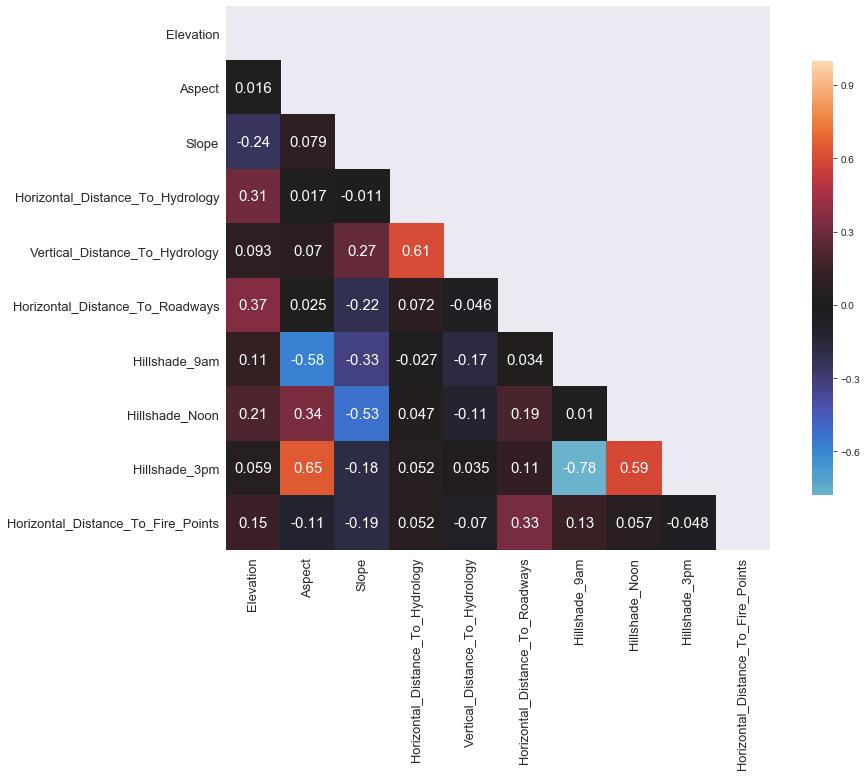

In [23]:
######    5    #######
# Correlation Plot
# Correlation of each feature

# fig size
plt.subplots(figsize=(15, 10))

# Compute the correlation matrix
num_fea_corr = num_fea.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(num_fea_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generates heatmap masking the upper triangle and shrinking the cbar
sns.heatmap(num_fea_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})

# x-axis label size
plt.xticks(size = 13)
# y-axis label size
plt.yticks(size = 13)

# display plot
plt.show()

- Features that have less or no correlation are colored `black` while features with positive correlation are colored `orange` and `blue` for negative correlation.

- As we can see from the above figure, correlation values of the features are given in their respective boxes. 

- `Hillshade_3pm and Hillshade_9am` show highly `negative correlation` while `hillshade_3pm and Aspect` show highest positive correlation.

- `Hillshade_3pm and Aspect` also had almost normal distribution compared to forest cover types classes. ([Plot 4.1](#Feature-Visualization))

- Other features which have correlations are `Vertical and Horizonal Distance to Hydrology`, `Hillshade_3m and Hillshade_Noon`, `Hillshade_9am and Aspect` and `Hillshade_Noon and Slope`. So in total we have `6` pairs of correlation.

- Less Correlated value tell us that the features have different valueable information to tell us and model, hence important features for predictions.

**Plotting scatter plots of all features that have correlation greater than 0.5 with each other.**

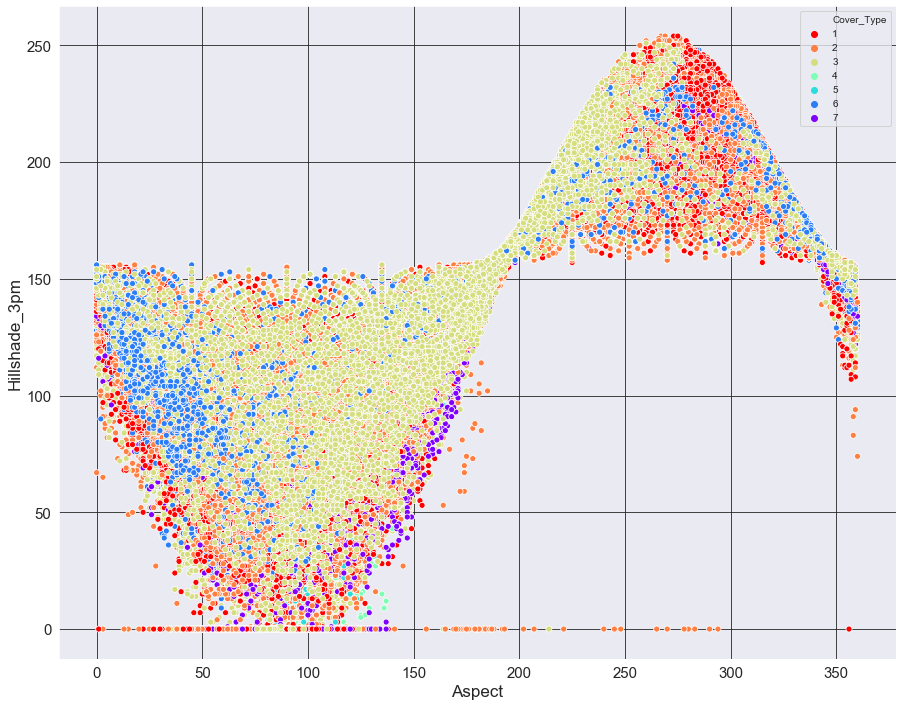

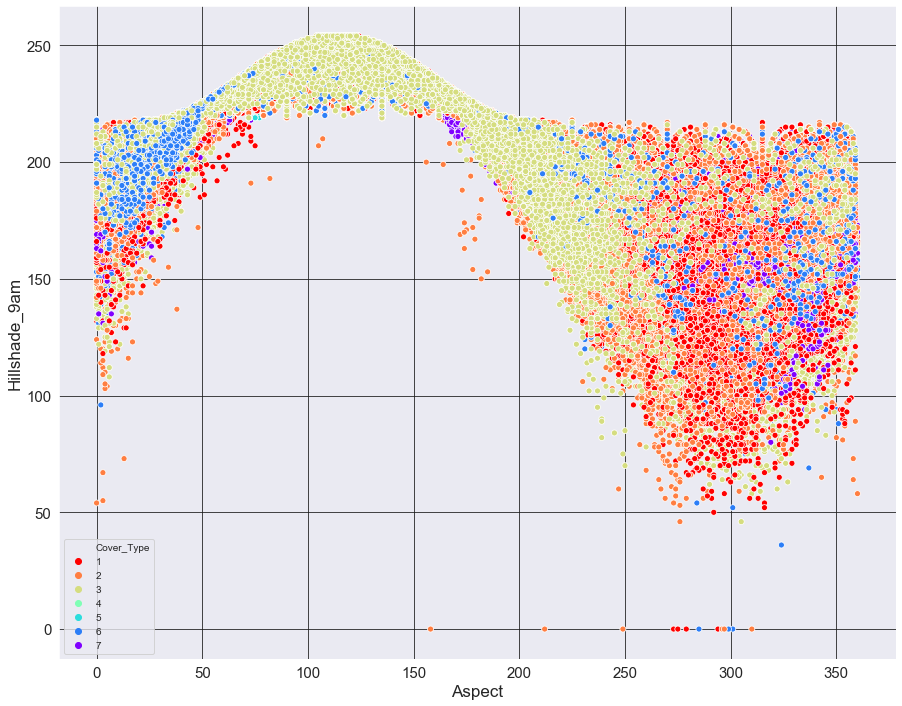

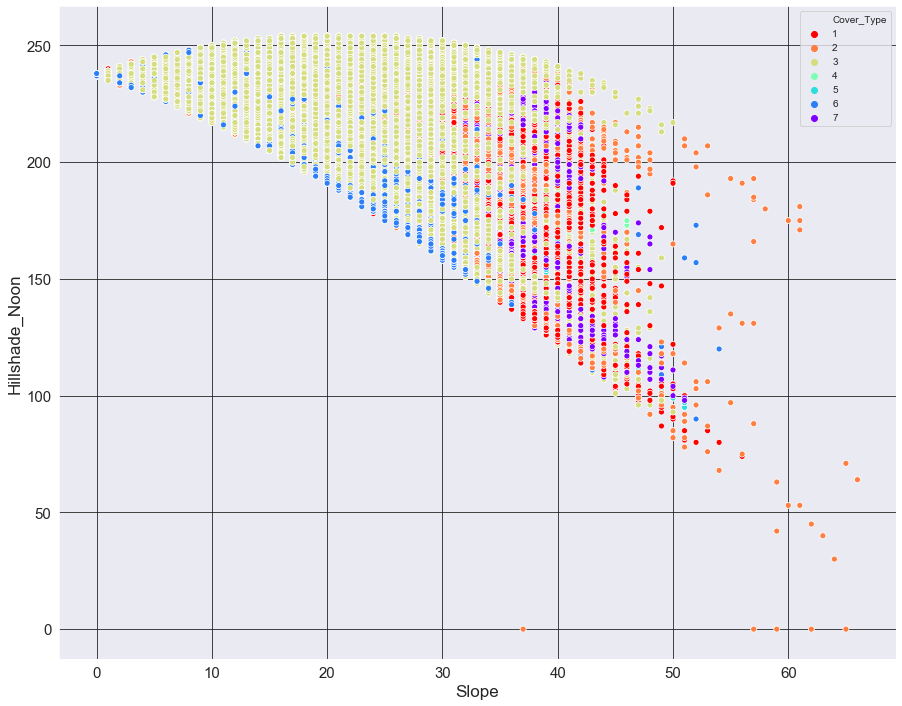

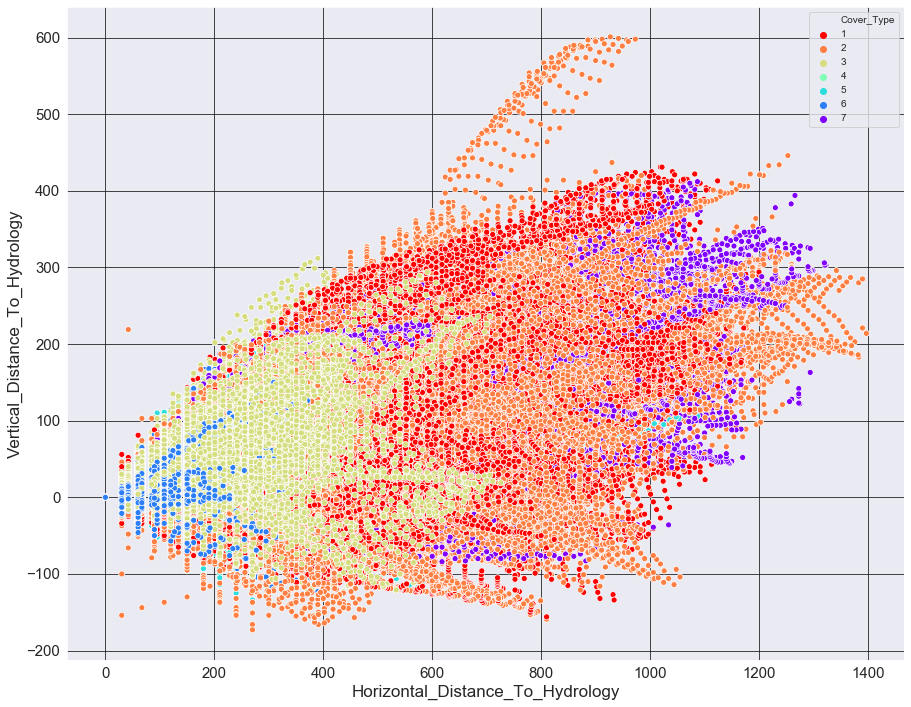

In [ ]:
#####    6    #####
# Scatter Plots
# Correlation that have greater than 0.5

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# giving list of lists
# inner lists conatains pairs of feature which have high correlation
list_data_cor = [['Aspect','Hillshade_3pm'], ['Aspect', 'Hillshade_9am'], ['Slope', 'Hillshade_Noon'], ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], 
                 ['Hillshade_3pm', 'Hillshade_9am'], ['Hillshade_3pm', 'Hillshade_Noon']]


# Looping through outer list
# taking 2 features from inner list
for i,j in list_data_cor:
    
    # fig size
    plt.subplots(figsize=(15, 12))
    
    #plot 1 feature on x axis and other on y axis, each point shows which cover forest they belong to
    sns.scatterplot(data = data, x = i, y = j, hue="Cover_Type", legend = 'full', palette='rainbow_r')

    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 15)

    # Horizontal axis Label
    plt.xlabel(i, size = 17)
    # Vertical axis Label
    plt.ylabel(j, size = 17)
  
    # display plot
    plt.show()

Wooaahh..! Those patterns..!

- `Hillshade_3pm and Aspect` represent relationship of a `sigmoid function`. The data points at the boundaries of the figure mostly belong to `forest cover type class 1` while `class 3` takes on most of datapoints in the figure followed by `forest cover type class 6`. The datapoints when `Hillshade_3pm` is `0` belongs to `class 1,2,3 or 7` regardless of what `Aspect` values it has.

- The figure `Hillshade_9am and Aspect` also represent relationship of a `sigmoid function` just its flipped over the y-axis. `Class type 3` has the highest observation here followed by the `class type 1 and 6`.

- `Hillshade_Noon and Slope` have a horizontal `'V' shaped` representation. Lower degrees represent `class 4 and 6` while high degree values represent `class 1, 2 and 7` also we can see decrease in `Hillshade_Noon` value as slope increases and it geographically makes sense.

- `Vertical and Horizontal Distance to Hydrology` represent a `linear` but spreaded out type, not a single line fit to all datapoints. `Class type 7 and 2` have more observation here and spreaded out while `class type 3 and 6` are densely packed between the range `0-800m` of `Horizontal Distance to Hydrology`.

- ` Hilshade_9am and Hillshade_3pm` figure represents relationship of a sliced-out part of a circle where top most of the datapoints belong to `class 3` and middle and bottom area belong to rest of the classes.

- `Hillshade_Noon and Hillshade_3pm` have similar observation as described before just a difference here is that it's flipped over y-aixs. We also see similar patterns of datapoints too as before.

**Now lets move on to the next part of the project, Data Engimeering** where I am going to :

- Delete feature which has `'0'` value for all observation.
- Delete observation which has null values in any of its features.
- Deleting duplicate entries but keeping first.
- Take a look at if any observations is present in more than one type in same category of Wilderness and Soil Type.
- Reducing features by keeping best.
- Scaling values in specific range.
- Peform Train-Test Split.

-------
-------

## Data Engineering

### Observation Cleaning

There's a possibility where we can have an observation where `Soil Type` and `Wilderness Area` are recorded as present for more than one type or maybe none.

Below code will show us if we have any..

**Checking for Wilderness Area.**

In [ ]:
# Checking if any observation have more than 1 presence of Wilderness area at same time or None

# Count for more than 1 presence
more_count = 0
# Count for none presence
none_count = 0
# total count
total = 0

#looping through each row of wilderness area column
for index, row in Wild_data.iterrows():
    # adding the values of each column of that row
    total = row.sum(axis=0)
    
    #checking greater than 1
    if total > 1:
        # if found, increment count by 1
        more_count =+ 1
        # reset the total
        total = 0
        # do not execute code below, start from top
        break
        
    #checking for none   
    if total == 0:
        # if found, increment count by 1
        none_count =+ 1
        # reset the total
        total = 0      

# priting results found
print('We have ', more_count, ' observations that shows presence in more than 1 Wilderness Area.')
print('We have ' ,none_count, ' observations that shows no presence in any Wilderness Area.')

**Checking for Soil Type.**

In [ ]:
# Checking if any observation have more than 1 presence of Soil Type area at same time or None

# Count for more than 1 presence
more_count = 0
# Count for none presence
none_count = 0
# total count
total = 0

#looping through each row of Soil Type area column
for index, row in Soil_data.iterrows():
    # adding the values of each column of that row
    total = row.sum(axis=0)
    
    #checking greater than 1
    if total > 1:
        # if found, increment count by 1
        more_count =+ 1
        # reset the total
        total = 0
        # do not execute code below, start from top
        break
        
    #checking for none   
    if total == 0:
        # if found, increment count by 1
        none_count =+ 1
        # reset the total
        total = 0      

# priting results found
print('We have ', more_count, ' observations that shows presence in more than 1 Soil Type Area.')
print('We have ' ,none_count, ' observations that shows no presence in any Soil Type Area.')

So we have **None** to worry about. Thanks to the authors of the data. 

Another way to approach this problem would be to simply add total counts of each types in Wilderness Area and Soil Type Categories and check if each category is equal to the number of observation in the data we have...

#### Handling Missing Values

**Removing Observation which has any Missing Values in it....**

In [28]:
# will delete observation if it has any missing values in any of the features.
data.dropna()

# shape of the data after deleting missing entries
data.shape

(581012, 55)

NO Missing Values...!! That's great!

#### Handling Duplicates

In [29]:
# deleting duplicates, except the first observation
data.drop_duplicates(keep='first')

# shape of the data after deleting duplicate entries
data.shape

(581012, 55)

NO Duplicates too..! Neat!

--------

### Dimentionality Reduction

- Since we already have lots of observation now to train the model, we also happen to have lots of features. This will make algorithm run very slowly, have difficulty in learning and also tend to overfit in training set and do worse in testing.

- We also see above in visualization section that `Wilderness Area` and `Soil Type` Area have no category that has no observations of it. So every feature has presence or values of an observations so we can't just delete any feature since it may have an important informations for our models in predicting classes.

- To approach such a problem, we need to see how each feature has an impact on prediciting classes, and the best way to do this is by asking the models only.

- Classifiers like `Extra Trees, Random Forest, Gradient Boosting Classifiers and AdaBoost` offer an attribute called `'feature_importance_'` with which we can see that which feature has more importance compared to others and by how much.

So now let's run all the 4 classifiers on our entire model, train from it and give us which feature for that was important in terms of predicting classes.

In [31]:
# feeding all our features to var 'X'
X = data.iloc[:,:-1]
# feeding our target variable to var 'y'
y = data['Cover_Type']

### Train-Test Split

Now our data is ready to be splitted into **75%-25% train-test set respectively**.

In [40]:
# importing train-test function
from sklearn.model_selection import train_test_split

# split the data in 75%-25% train-test respectively with fixed state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 53)

In [41]:
# number of training observation
print(X_train.shape, X_test.shape)

(435759, 54) (145253, 54)


Lots of data to train and test on.

#### Extra-Trees Classifier

In [ ]:
# importing model for feature importance
from sklearn.ensemble import ExtraTreesClassifier

# passing the model
model = ExtraTreesClassifier(random_state = 53)

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
ETC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ETC']).sort_values('ETC', ascending=False)

# removing traces of this model
model = None

# show top 10 features
ETC_feature_importances.head(10)

#### Random Forest Classifier

In [ ]:
# importing model for feature importance
from sklearn.ensemble import RandomForestClassifier

# passing the model
model = RandomForestClassifier(random_state = 53)

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
RFC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['RFC']).sort_values('RFC', ascending=False)

# removing traces of this model
model = None

# show top 10 features
RFC_feature_importances.head(10)

#### AdaBoost Classifier

In [ ]:
# importing model for feature importance
from sklearn.ensemble import AdaBoostClassifier

# passing the model
model = AdaBoostClassifier(random_state = 53)

model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
ADB_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ADB']).sort_values('ADB', ascending=False)

# removing traces of this model
model = None

ADB_feature_importances.head(10)

In [42]:
import time
# records time
#c_start = time.time() 
#c_end = time.time() 
#t_tot = np.round((c_end - c_start) / 60, 3)
#t_tot

#### Gradient Boosting Classifier

In [43]:
# importing model for feature importance
from sklearn.ensemble import GradientBoostingClassifier

# passing the model
model = GradientBoostingClassifier(random_state = 53)

# training the model
c_start = time.time() 
model.fit(X_train, y_train) #For 100 iteerations
c_end = time.time() 
T1 = np.round((c_end - c_start) / 60, 3)

# extracting feature importance from model and making a dataframe of it in descending order
GBC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['GBC']).sort_values('GBC', ascending=False)

# removing traces of this model
model = None

# show top 10 features
GBC_feature_importances.head(10)

GBC
Elevation                           0.656610
Horizontal_Distance_To_Roadways     0.051327
Horizontal_Distance_To_Fire_Points  0.040493
Horizontal_Distance_To_Hydrology    0.039787
Wilderness_Area1                    0.024282
Hillshade_Noon                      0.021888
Soil_Type4                          0.018243
Soil_Type22                         0.013931
Soil_Type2                          0.013110
Wilderness_Area3                    0.012693

In [45]:
T1*30

211.5

There they are, each classifier giving its top choice of features.

- We can see that `RFC` and `ETC` show similar results, yes there are features which show-up different ranks but not of a great difference. Each feature show a little similar numbers.

- `GBC` also happens to show similar results but little different that those `RFC` and `ETC` classifier's results.

- `ADBC`, show a unique and very interesting results. The top `8` features are alone enough to predict classes and highest taken is by `Wilderness Area4` followed by `Elevation` which was being followed in other classifiers!! This is interesting because `Wilderness Area4` isn't even present in the top `10` except of `RFC` which had showed about `4.38%` importance which is very different than `ADBC`'s result score of `44&`

- `Elevation` do take on similar dominance in predicting class, being around `22-24%` for every classifier except for `GBC', a whooping ~66% dominance is shown for it!!

- `Hillshade` features are seen on top 10 list of every classifier except for `ADB`. `ETC` and `RFC` show all `Hillshade` features having similar dominance while `GBC` shows a percent less.

- In above Visualization section of [Correlation](#Feature-Correlation), we saw that `Hillshade` features had nice correlation with each other also other features like `SLope`, `Aspect`, `Horizontal and Vertical Distance to Hydrology` showed high correlations values. They also show dominance here in predicting, meaning they might had correlated but they have very useful information in predicting target variable.

- `Elevation`, `Vertical and Horizontal distance to Hydrology` show presence in top 10 for all classifiers, hence important features.

- `Horizontal Distance to Roadway`s and `Fire Points` had highest standard deviation score including outliers, making up in the list, it might be that different ranges of each feature represent different class types.

- `Aspect`, `Slope` and` Hillshade` s features had least standard deviation and `slope` and `hillshade` s taking on least range of values and also making top in the list except `Slope` and `Aspect` dont show up in top 10 in `GBC`.

- All these classification tell us one thing in common, Numerical Features dominate when it comes to predicting forest classes.

- All that being said, I will now go with features that show up in the top in most classifiers. Top `15-20` would be a reasonable choice.

**Comparing the top 24 features evaluated by `Random Forest` and `Extra Tree Classifier` side by side**

| Features by RF | Features by ETC |
| --------- |  --------- | 
| Elevation |  Elevation | 
| Horizontal_Distance_To_Roadways |  Horizontal_Distance_To_Roadways | 
| Horizontal_Distance_To_Fire_Points | Horizontal_Distance_To_Fire_Points | 
| Horizontal_Distance_To_Hydrology |  Horizontal_Distance_To_Hydrology | 
| Vertical_Distance_To_Hydrology | Vertical_Distance_To_Hydrology |
| Aspect | Aspect |
| Wilderness_Area4 |  Hillshade_Noon | 
| Hillshade_Noon | Hillshade_3pm | 
| Hillshade_3pm |  Hillshade_9am | 
| Hillshade_9am |  Slope | 
| Slope |  Wilderness_Area4 | 
| Soil_Type22 |  Soil_Type22 | 
| Soil_Type10 |  Soil_Type10 | 
| Soil_Type38 |  Soil_Type4 | 
| Soil_Type4 |  Soil_Type23 | 
| Soil_Type39 |  Soil_Type38 | 
| Soi_Type12 |  Wilderness_Area3 |
| Wilderness_Area3 |  Soil_Type39 |
| Soil_Type_23 |  Wilderness_Area1 | 
| Wilderness_Area1 |  Soil_Type12 | 
| Soil_Type2 |  Soil_Type2 | 0
| Soil_Type40 |  Soil_Type40 |
| Soil_Type32 |  Wilderness_Area2 | 
| Wilderness_Area2 |  Soil_Type13 | 

Out of these top 24 features, I would take like to go with **Top 20**. There's no reasonable justification to why I chose this but my intuition say that these will do the job. I could have taken results of AdaBoost having just 8 features but I think that would be an underestimation after what we see in visualizations and other 3 classification results. 

In [46]:
## feeding top 20 features in a variable as dataframe including target variable

## AdaBoost Sample
#sample = data[['Wilderness_Area4', 'Elevation','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Aspect','Wilderness_Area4', 'Soil_Type4', 'Soil_Type10' 'Cover_Type']]

sample = data[['Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Aspect','Wilderness_Area4',
            'Hillshade_Noon','Hillshade_3pm','Hillshade_9am','Slope','Soil_Type22','Soil_Type10','Soil_Type4','Soil_Type34','Soil_Type34','Wilderness_Area3','Soil_Type12',
            'Soil_Type2','Wilderness_Area1', 'Cover_Type']]

Finding Useful features and having reasonable dimentions we are ready to move on to our nest step of feature scaling.

---------

Lots of data to train and test on.

### Feature Scaling

One last step before we move to splitting our data to Train-Test Split is to scale the features to some specific range. This is called Feature Scaling. We will scale all feature values to specific range of `0 to 1`. but before we do this we will split the feature and target variables because we dont want to scale our target variable..

In [48]:
# importing feature scaling function
from sklearn.preprocessing import MinMaxScaler

# passing range to the function and then save it
scaler = MinMaxScaler(feature_range = (0,1))

# feeding sample features to var 'X'
X = sample.iloc[:,:-1]

# feeding our target variable to var 'y'
y = sample['Cover_Type']

# apply feature scaling to all features
X_scaled = scaler.fit_transform(X)
#s_sample_2 = scaler.fit_transform(X2)

In [49]:
# our data after feature scaling
X_scaled

array([[0.36868434, 0.07165941, 0.87536596, ..., 0.        , 0.        ,
        1.        ],
       [0.36568284, 0.05479837, 0.86783772, ..., 0.        , 0.        ,
        1.        ],
       [0.47273637, 0.44681748, 0.85333891, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.26363182, 0.01264578, 0.11905758, ..., 0.        , 1.        ,
        0.        ],
       [0.26263132, 0.01264578, 0.12045169, ..., 0.        , 1.        ,
        0.        ],
       [0.26213107, 0.00941408, 0.12198522, ..., 0.        , 1.        ,
        0.        ]])

-------

### Train-Test Split

Now our data is ready to be splitted into **75%-25% train-test set respectively**.

In [50]:
# importing train-test function
from sklearn.model_selection import train_test_split

# split the data in 75%-25% train-test respectively with fixed state
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 53)

In [51]:
# number of training observation
print(X_train.shape, X_test.shape)

(435759, 20) (145253, 20)


-------

-----------

## Model Evaluations


Now its time to feed our data to the models to see how each models performs using 2 different `evaluation metrics` **`accuracy`** and **`f1 score`** and see which model performs the best. 

But before that, we will train our data on training set and test the performance of the Benchmark model we discussed about in the start of the project. I will use 10 K-Fold CV to test the performance of our model. I had choosen Naive Bayes Classifier as my benchmark model and I am going to use **`Multimonial Naive Bayes classifier`** since we have a claasification problem to solve.

The `Evaluation Metric` I am going to use are `f1 score` and `accuracy` to see how well our model performs.

- `Accuracy` is the measure of the correct predicted data divided by total number of observations hence giving a value ranging between `0 and 1`, while `0` is no correctly predicted class whereas `1` is all correctly predicted class. We can multiply the result by `100` to get the accuracy score in terms of percent.

- `F1 score` is more useful than accuracy specially in the case where you have uneven amount of class distribution as in our case. It's the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. 

-  `Accuracy` works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall or `F1 score`. 

First I will define a function which will train the `models` using training data and calculate model's performance using `accuracy` and `f1 score`. One sets of instruction for all `models`!

In [52]:
### defining function for training models and measuring performance 

# to measure performance
from sklearn.model_selection import cross_val_score

# for calculating time elapsed
import time

# fucntion
def model_evaluation(clf):
    
    # passing classifier to a variable
    clf = clf
    
    # records time
    t_start = time.time()
    # classifier learning the model
    clf = clf.fit(X_train, y_train)
    # records time
    t_end = time.time()
    
    
    # records time
    c_start = time.time()     
    # Using 10 K-Fold CV on data, gives peroformance measures
    accuracy  = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    f1_score = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'f1_macro')
    # records the time
    c_end = time.time()    
    
    
    # calculating mean of all 10 observation's accuracy and f1, taking percent and rounding to two decimal places
    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)
    
    
    # substracts end time with start to give actual time taken in seconds
    # divides by 60 to convert in minutes and rounds the answer to three decimal places
    # time in training
    t_time = np.round((t_end - t_start) / 60, 3)
    # time for evaluating scores
    c_time = np.round((c_end - c_start) / 60, 3)
    
    
    # Removing traces of classifier
    clf = None
    
    
    # returns performance measure and time of the classifier 
    print("The accuracy score of this classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"% taking", t_time,"minutes to train and", c_time,
          "minutes to evaluate cross validation and metric scores.")

------

### Benchmark Model

Now lets see the performance of `MultinomialNB classifier` on given training data.

In [53]:
# importing Multinomial classifier, one of the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# passing the model to function to get performance measures
model_evaluation(MultinomialNB())

The accuracy score of this classifier on our training set is 56.22 % and f1 score is 23.07 % taking 0.002 minutes to train and 0.052 minutes to evaluate cross validation and metric scores.


It performed quite well, atleast what I had expected in terms of accuracy but it performs poorly in `precision` and `recall` and that's what `f1 score` evaluates for us. 

Let's now move on to measure performance on the models that I have chose for this problem, they are:

    1. K-Nearest Neighbour (KNN) 
    2. Random Forest (RF)
    3. Stochastic Gradient Descent Classifier (SGDC)
    4. Extraa Trees Classifier (ETC)
    5. Logistic Regression (LR)

**I have evaluated below models without tuning any parameters and using just default set by sklearn except for `n_job`s and `random_state` where `n_jobs` is set to `-1` to use all cpu's and `ranodom_state` is set to `53` for getting even results across runs. I have chosen default parameters just to see how each models perform on this data with its default parameters (good for newbies) and if results aren't accurate as expected then I might change it. But for now I will stick to default for training.**

### 1. K-Nearest Neighbors

In [55]:
# importing K-Nearest Neighbors Classifier function
#from sklearn.neighbors import KNeighborsClassifier

#model_evaluation(KNeighborsClassifier(n_jobs=-1))

### 2. Random Forest Classifier

In [56]:
# importing Random Forest function
from sklearn.ensemble import RandomForestClassifier

model_evaluation(RandomForestClassifier(n_jobs=-1, random_state = 53))

The accuracy score of this classifier on our training set is 93.37 % and f1 score is 89.09 % taking 0.034 minutes to train and 0.806 minutes to evaluate cross validation and metric scores.


### 3. Stochastic Gradient Descent Classifier

In [ ]:
# importing Stochastic Gradient Descent Classifier function
from sklearn.linear_model import SGDClassifier

model_evaluation(SGDClassifier(n_jobs=-1, random_state = 53))

### 4. Extra Trees Classifier

In [ ]:
# importing AdaBoost classifier
from sklearn.ensemble import ExtraTreesClassifier

model_evaluation(ExtraTreesClassifier(n_jobs=-1, random_state = 53))

### 5. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

model_evaluation(LogisticRegression(n_jobs = -1, random_state = 53))

The accuracy score of this classifier on our training set is 69.7 % and f1 score is 35.88 % taking 0.572 minutes to train and 8.79 minutes to evaluate cross validation and metric scores.


Seeing the results now and before moving to next step of choosing the model let me give all the values of all the parameters of the models used above that is given by default by sklearn.

**Parameters Values for KNN:**
    - n_neighbors = 5, 
    - weights = ’uniform’, 
    - algorithm = ’auto’, 
    - leaf_size = 30, 
    - p = 2, 
    - metric = ’minkowski’, 
    - metric_params = None, 
    - n_jobs = -1
    
**Parameters Values for RFC:**
    - n_estimators = 10, 
    - criterion = ’gini’, 
    - max_depth = None, 
    - min_samples_split = 2, 
    - min_samples_leaf = 1, 
    - min_weight_fraction_leaf = 0.0, 
    - max_features = ’auto’, 
    - max_leaf_nodes = None, 
    - min_impurity_decrease = 0.0, 
    - min_impurity_split = None, 
    - bootstrap = True, 
    - oob_score = False, 
    - n_jobs = -1, 
    - random_state = 53, 
    - verbose = 0, 
    - warm_start = False, 
    - class_weight = None

**Parameters Values for SGDC:**
    - loss = ’hinge’, 
    - penalty = ’l2’, 
    - alpha = 0.0001, 
    - l1_ratio = 0.15, 
    - fit_intercept = True, 
    - max_iter = None, 
    - tol = None, 
    - shuffle = True, 
    - verbose = 0, 
    - epsilon = 0.1, 
    - n_jobs = -1, 
    - random_state = 53, 
    - learning_rate = ’optimal’, 
    - eta0 = 0.0, 
    - power_t = 0.5, 
    - class_weight = None, 
    - warm_start = False, 
    - average = False, 
    - n_iter = None

**Parameters Values for ETC:**
    - n_estimators = 10, 
    - criterion = ’gini’, 
    - max_depth = None, 
    - min_samples_split = 2, 
    - min_samples_leaf = 1, 
    - min_weight_fraction_leaf = 0.0, 
    - max_features = ’auto’, 
    - max_leaf_nodes = None, 
    - min_impurity_decrease = 0.0, 
    - min_impurity_split = None, 
    - bootstrap = False, 
    - oob_score = False, 
    - n_jobs = -1, 
    - random_state = 53, 
    - verbose = 0, 
    - warm_start = False, 
    - class_weight = None
    
**Parameters Values for LR:**    
    - penalty = ’l2’, 
    - dual = False, 
    - tol = 0.0001, 
    - C = 1.0, 
    - fit_intercept = True, 
    - intercept_scaling = 1, 
    - class_weight = None, 
    - random_state = 53, 
    - solver = ’liblinear’, 
    - max_iter = 100, 
    - multi_class = ’ovr’, 
    - verbose = 0, 
    - warm_start = False, 
    - n_jobs = 1

-------

### Choosing Model

Out of 5 Models evaluated above and benchmark model, which performs better? Lets see all the scores of all the models in a table below:

| Model | Accuracy | F1 Score | Train Time (m) | Evaluation Time (m) |
| ----- | -------- | -------- | ---------- | --------------- |
| MNB | 56.22% | 23.07 | 0.003 | 0.077  -  0.078 |
| **KNN** | **92.39%** | **87.07%** | **3.423  -  3.548** | **100.721  -  110.443** |
| **RF** | **93.37%** | **89.09%** | **0.092** | **3.764  -  3.853** |
| **SGDC** | 69.34% | 30.77% | 0.026 - 0.031 | 1.302  -  1.448 |
| **ETC** | **92.93%** | **89.14%** | **0.046  -  0.063** | **2.485  -  2.633** |
| **LR** | 69.7% | 36.88% | 0.942 | 16.366 |

**Here it is, default params have done the job! Clearly all models beating our benchmark model.**

- `KNN` performs here stunningly awesome, getting accuracy `92.39%` and `87.07%` of F1 score. Though it takes highest training and evaluation time there but it has gotten results very well.

- `Random Forest` here gets highest accuracy result of `93.37%` taking seconds to train and couple of minutes running cross validation and metrics results. Also given its flexibility it has perofrmed so well with default params.

- `Stochastic Gradient Descent` has shocked me with its accuracy and F1 score results. In proposal I had mentioned that this and Random Forest would be really intresting to see as their results might be really high and close enough and would be tough call to pick but it turned out to be opposite now. Might some tuning in parameter would get a little better result but I dont think it would beat Random Forest or Extra Trees Classifier and that was the whole point as discussed before, to see results based on default params of models. SGDC has least training and evaluation time.

- `Extra Trees` gets highest F1 score result of `89.14%` hasn't disappointed with its metrics results and runtime, both RFC and this have close call on accuracy having less than a percent difference and similar runtimes.

- `Logistic Regression` has similar results as `SGDC` but has better F1 score and takes more time in evaluation. But for LR, an expected results atleast for me.

- Benchmark model used here `Multinomial Naive Bayes`, has been beaten by all models above that I chose for solution both in terms of accuracy and F1 score.

Choosing best classifiers among these 3 which are bold in table is little tight atleast between `RF` and `ETC`. `KNN` have preformed well predicting classes, `n_neighbors`, which is the parameter of `KNN`, set to `5` by default has done it but it just took alot of evaluation time also train time was highest among all but its reasonable in general atleast for this particular data. 

So to pick one model I would consider not only having best accuracy score but also `F1 score` since `F1 scores` are more important as they give us an weighted average score of both `precision` and `recall`, where `precision` is intuitively the ability of the classifier not to label as positive a sample that is negative and `recall` it's the number of positive prediction divided by the number of positive class values and `F1 score` is the balance of both of these. Let us dig deep into f1 before we choose our final model.

So all that said, hows it calculated, whats the formula? Let us see....

$$F1=2 \cdot \frac{𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 \cdot 𝑟𝑒𝑐𝑎𝑙𝑙}{𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 + 𝑟𝑒𝑐𝑎𝑙𝑙}$$

where `Precision` is calculated by..

$$Precision = \frac{TP}{TP + FP}$$

and `Recall` is calculated by....

$$Recall = \frac{TP}{TP + FN}$$

`ETC` do have here high F1 score by 0.005 but it has lower accuracy score of 0.43 compared to `RFC`.

So with that said, **I will be picking `Random Forest` as my final model to evaluate on the test set and see its performance on it.** Will it perform better or same? Lets check it out!

-------
-------

## Testing Model

Since I had chosen default params above in `Random Forest` in training set, I will be **tuning important param** that might give us more better results. Later I will discuss about it.

In [ ]:
# importing EM scores for model performance measure
from sklearn.metrics import accuracy_score, f1_score

# definning best chosen classifier
clf = RandomForestClassifier(n_estimators = 50, random_state = 53)

# training our model
clf = clf.fit(X_train, y_train)

# predicting unseen data
predict = clf.predict(X_test)

# calculating accuracy
accuracy = accuracy_score(y_test, predict)

# calculating f1 score
f1_score = f1_score(y_test, predict, average = 'macro')

# taking precentage and rounding to 3 places
accuracy = np.round(accuracy * 100, 3)
f1_score = np.round(f1_score * 100, 3)

# cleaning traces
clf = None

# results
print("The accuracy score of our final model Random Forest Classifier on our testing set is", accuracy,"% and f1 score is", f1_score,"%.")

**Better results of what we got in training. `n_estimator` parameter has done the job!**

The default value of `n_estimator` was 10 which was used in training data. `n_estimators` is the number of trees we want to build before taking the maximum voting or averages of predictions. Higher number of trees gives us better performance but makes code run little slower. Choosing as high value makes our predictions stronger and more stable. `50` is reasonable value and increasing more will take more proceesing power but would give you increasing scores but at not that much of a difference than with `50`. 

Below I have given all the values that I have tried on `n_estimators` and `accuracy` and `f1` score got:

| n_estimator | accuracy | F1 score |
| ----------- | -------- | -------- |
| 10 | 93.6% | 89.4% |
| 15 | 94.257% | 90.6% |
| 20 | 94.545% | 90.867% |
| 25 | 94.644% | 91.067% |
| 30 | 94.758% | 91.225% |
| 50 | 94.923% | 91.453% |

As we see from above table, if we compare `RFC` with our training result with same `n_estimators` of `10`, we see that it has performed better by `.3` and `.4` in `accuracy` and `F1 score` respectively. And as we increase our `n_estimators` we see consistant increase in both scores but at some level it starts to slow down that consistancy as we see between `n_estimators` `30` and `50`. 

All that said our model in all has performed really well predicting classes even with oneven amount of distribution but thanks to the authors for giving us huge dataset of all classes for making prediction and our job to evaluate easier!

------
------

## Conclusion

Coming back from where we started in proposal, can we predict which `Forest Cover Type` it is, given `elevation, hydrologic, sunlight and wilderness area` data? **Yes we can! Tree models are your best friends in predicting forest cover types but when you got lots of time, your nearest neighbor isn't a bad choice to make too!!**